# Covid-19 in Charkiv Project

#### In this notebook we have 10 sections:
<ul>
    <li><b>Section 1:</b>In this section we will study the data graphically to get a better understanding about the evaluation of coronavirus cases and deaths.</li>
    <li><b>Section 2:</b>You will meet in this section how is the relation between the columns, and this section will give us a step forward in the evaluation of each column in the data.</li>
    <li><b>Section 3:</b>We will call this section, the "Machine Learning Section". We will train our data using linear regression model and try to predict the values in the upcoming days, and deduce the best model.</li>
    <li><b>Section 4:</b>Here we will try the model of non-linear regression.</li>
    <li><b>Section 5:</b>You can see here the results of using Lasso Regression</li>
    <li><b>Section 6:</b>Also here we will try to use Ridge Regression.</li>
    <li><b>Section 7:</b>We used a model called Kernel Ridge Regression.</li>
    <li><b>Section 8:</b>We used a model called ElasticNet.</li>
    <li><b>Section 9:</b>We used a model called ElasticNetCV.</li>
    <li><b>Section 10:</b>We used a model called KNeighborsRegressor (KNR).</li>
    <li><b>Section 11:</b>The last section in our notebook, results and discussions.</li>
</ul>

In [1]:
# importing the needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Section 1

In [2]:
# reading the data as a pandas DataFrame
df = pd.read_csv("Charkiv.csv")

In [3]:
# Dropping rows where we have missing data
list=[x for x in range(0,26)]
df.drop(list,axis=0,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
# Resetting the indexes after dropping
df.index=np.arange(0,len(df))

In [5]:
# adding a column called Day which will help us working with days insted of saying for example the day where
# the date is '01-01-2020', we can say the day 2.
df['Day']=df.index

In [6]:
# according to the high difference between new cases and new deaths, we will add a column which is the number of new cases
# per day divided by 10
df['new_case /10']=df['new_case']/10

In [7]:
# take a look about the first 5 rows of the data
df.head()

,Date,total_case,new_case,total_death,new_death,total_recovered,new_recovered,Day,new_case /10
0,4/14/2020,25.0,11.0,1.0,1.0,1.0,1.0,0,1.1
1,4/15/2020,40.0,15.0,1.0,0.0,2.0,1.0,1,1.5
2,4/16/2020,56.0,16.0,1.0,0.0,NaN,NaN,2,1.6
3,4/17/2020,62.0,6.0,1.0,0.0,NaN,NaN,3,0.6
4,4/18/2020,67.0,5.0,1.0,0.0,NaN,NaN,4,0.5


In [8]:
# check the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 9 columns):
Date               214 non-null object
total_case         214 non-null float64
new_case           214 non-null float64
total_death        214 non-null float64
new_death          214 non-null float64
total_recovered    172 non-null float64
new_recovered      172 non-null float64
Day                214 non-null int64
new_case /10       214 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 16.7+ KB


In [9]:
# interesting statistical values about the data
df.describe()

,total_case,new_case,total_death,new_death,total_recovered,new_recovered,Day,new_case /10
count,214.000000,214.000000,214.000000,214.000000,172.000000,172.000000,214.000000,214.000000
mean,10291.957944,219.028037,191.985981,3.294393,2186.447674,37.406977,106.500000,21.902804
std,12649.902154,246.457377,175.094595,2.868358,1802.567831,37.183244,61.920648,24.645738
min,25.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.200000
25%,1260.000000,33.500000,52.250000,1.000000,649.250000,11.000000,53.250000,3.350000
50%,3668.500000,75.500000,127.500000,2.000000,1826.000000,25.000000,106.500000,7.550000
75%,15412.000000,371.750000,306.250000,5.000000,3412.250000,48.000000,159.750000,37.175000
max,46886.000000,1074.000000,638.000000,13.000000,6434.000000,150.000000,213.000000,107.400000


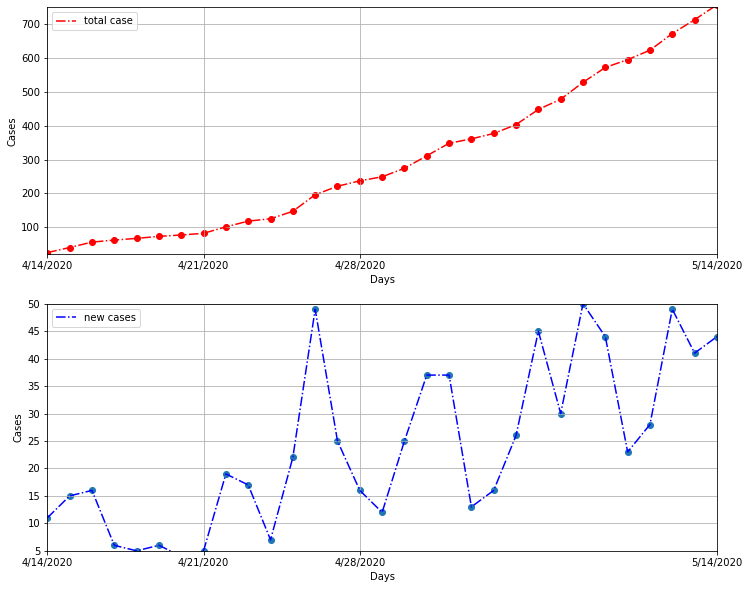

In [10]:
fig, ax = plt.subplots(2,figsize=(12,10))
ax[0].plot(df['Date'], df['total_case'],color='red',linestyle= '-.')
ax[1].plot(df['Date'], df['new_case'],color='blue',linestyle= '-.')

ax[0].set_ylabel("Cases")
ax[0].set_xlabel('Days')
ax[1].set_ylabel("Cases")
ax[1].set_xlabel('Days')

ax[0].legend(['total case'])
ax[1].legend(['new cases'])

ax[0].set_xlim('4/14/2020','5/14/2020')
ax[1].set_xlim('4/14/2020','5/14/2020')
ax[0].set_ylim(20,750)
ax[1].set_ylim(5,50)

ax[0].set_xticks(['4/14/2020','4/21/2020','4/28/2020','5/14/2020'])
ax[1].set_xticks(['4/14/2020','4/21/2020','4/28/2020','5/14/2020'])

ax[0].scatter(df['Date'][0:31],df['total_case'][0:31],c='red')
ax[1].scatter(df['Date'][0:31],df['new_case'][0:31])

ax[0].grid()
ax[1].grid()

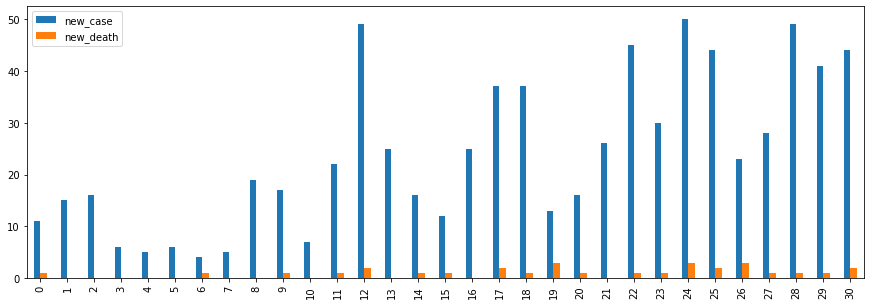

In [11]:
df[['new_case','new_death']][0:31].plot.bar(figsize=(15,5))

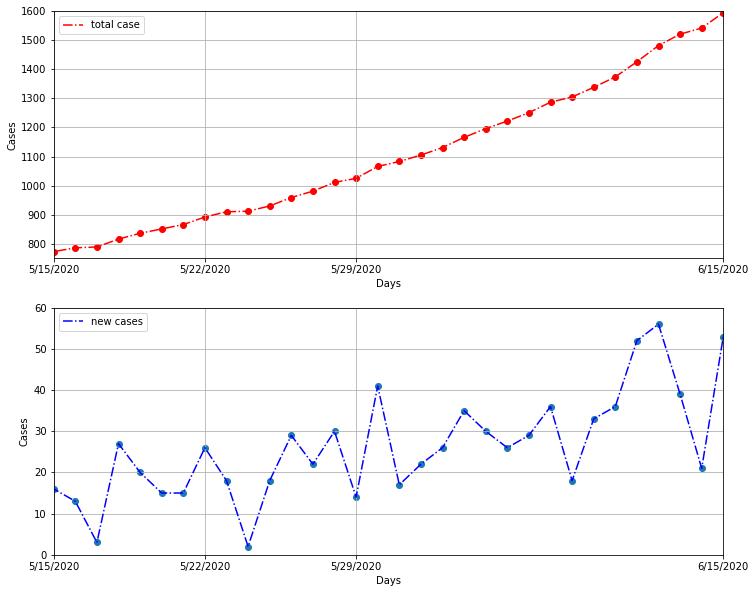

In [12]:
fig, ax = plt.subplots(2,figsize=(12,10))
ax[0].plot(df['Date'], df['total_case'],color='red',linestyle= '-.')
ax[1].plot(df['Date'], df['new_case'],color='blue',linestyle= '-.')

ax[0].set_ylabel("Cases")
ax[0].set_xlabel('Days')
ax[1].set_ylabel("Cases")
ax[1].set_xlabel('Days')

ax[0].legend(['total case'])
ax[1].legend(['new cases'])

ax[0].set_xlim('5/15/2020','6/15/2020')
ax[1].set_xlim('5/15/2020','6/15/2020')
ax[0].set_ylim(750,1600)
ax[1].set_ylim(0,60)

ax[0].set_xticks(['5/15/2020','5/22/2020','5/29/2020','6/15/2020'])
ax[1].set_xticks(['5/15/2020','5/22/2020','5/29/2020','6/15/2020'])

ax[0].scatter(df['Date'][31:63],df['total_case'][31:63],c='red')
ax[1].scatter(df['Date'][31:63],df['new_case'][31:63])

ax[0].grid()
ax[1].grid()

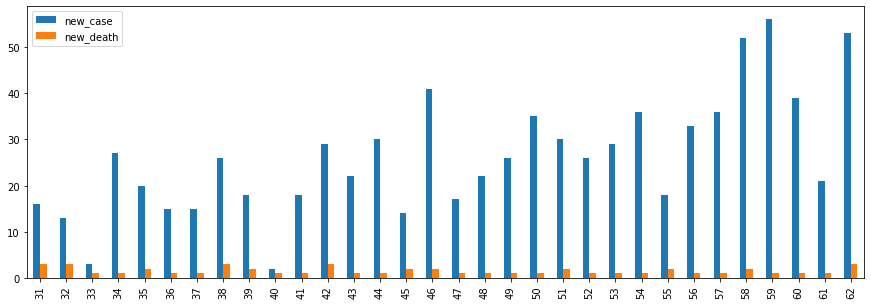

In [13]:
df[['new_case','new_death']][31:63].plot.bar(figsize=(15,5))

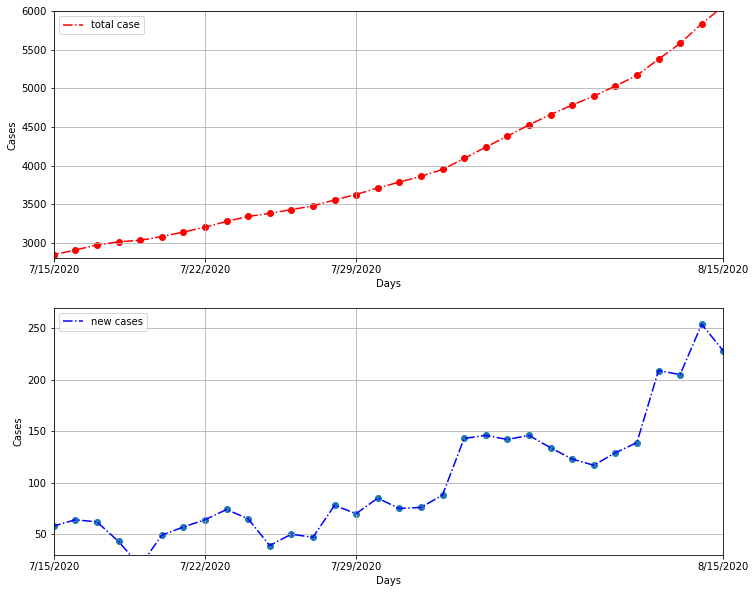

In [14]:
fig, ax = plt.subplots(2,figsize=(12,10))
ax[0].plot(df['Date'], df['total_case'],color='red',linestyle= '-.')
ax[1].plot(df['Date'], df['new_case'],color='blue',linestyle= '-.')

ax[0].set_ylabel("Cases")
ax[0].set_xlabel('Days')
ax[1].set_ylabel("Cases")
ax[1].set_xlabel('Days')

ax[0].legend(['total case'])
ax[1].legend(['new cases'])

ax[0].set_xlim('7/15/2020','8/15/2020')
ax[1].set_xlim('7/15/2020','8/15/2020')
ax[0].set_ylim(2800,6000)
ax[1].set_ylim(30,270)

ax[0].set_xticks(['7/15/2020','7/22/2020','7/29/2020','8/15/2020'])
ax[1].set_xticks(['7/15/2020','7/22/2020','7/29/2020','8/15/2020'])

ax[0].scatter(df['Date'][92:124],df['total_case'][92:124],c='red')
ax[1].scatter(df['Date'][92:124],df['new_case'][92:124])

ax[0].grid()
ax[1].grid()

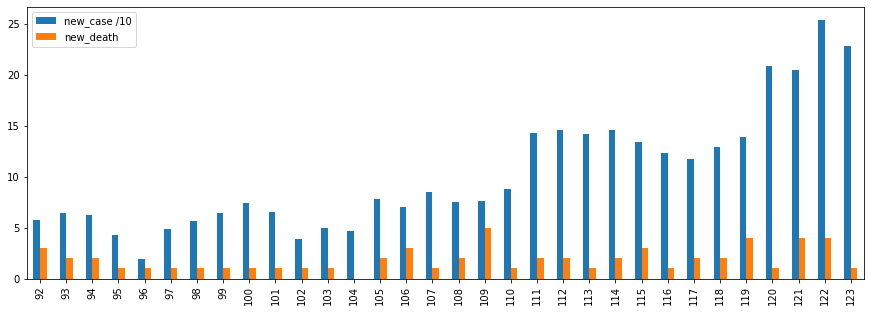

In [15]:
df[['new_case /10','new_death']][92:124].plot.bar(figsize=(15,5))

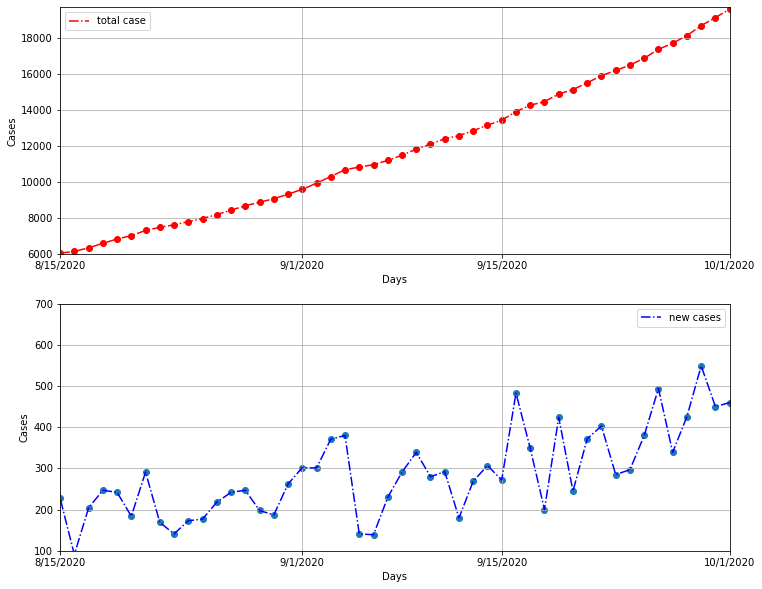

In [16]:
fig, ax = plt.subplots(2,figsize=(12,10))
ax[0].plot(df['Date'], df['total_case'],color='red',linestyle= '-.')
ax[1].plot(df['Date'], df['new_case'],color='blue',linestyle= '-.')

ax[0].set_ylabel("Cases")
ax[0].set_xlabel('Days')
ax[1].set_ylabel("Cases")
ax[1].set_xlabel('Days')

ax[0].legend(['total case'])
ax[1].legend(['new cases'])

ax[0].set_xlim('8/15/2020','10/1/2020')
ax[1].set_xlim('8/15/2020','10/1/2020')
ax[0].set_ylim(6000,19700)
ax[1].set_ylim(100,700)

ax[0].set_xticks(['8/15/2020','9/1/2020','9/15/2020','10/1/2020'])
ax[1].set_xticks(['8/15/2020','9/1/2020','9/15/2020','10/1/2020'])

ax[0].scatter(df['Date'][123:171],df['total_case'][123:171],c='red')
ax[1].scatter(df['Date'][123:171],df['new_case'][123:171])

ax[0].grid()
ax[1].grid()

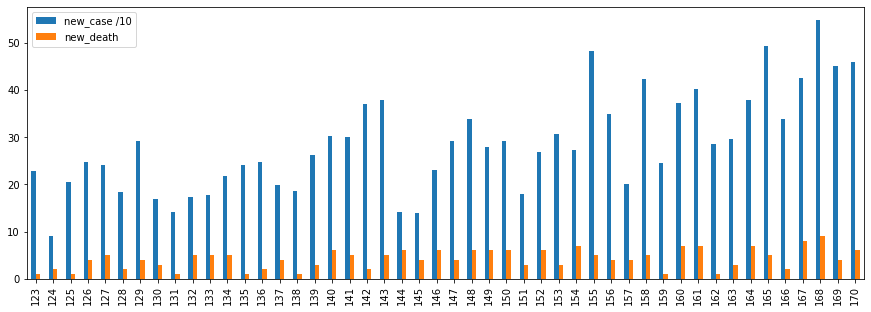

In [17]:
df[['new_case /10','new_death']][123:171].plot.bar(figsize=(15,5))

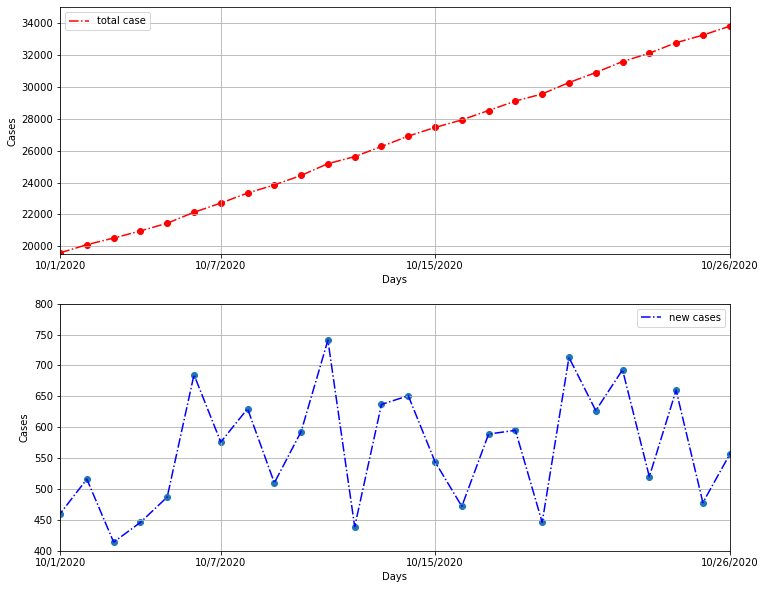

In [18]:
fig, ax = plt.subplots(2,figsize=(12,10))
ax[0].plot(df['Date'], df['total_case'],color='red',linestyle= '-.')
ax[1].plot(df['Date'], df['new_case'],color='blue',linestyle= '-.')

ax[0].set_ylabel("Cases")
ax[0].set_xlabel('Days')
ax[1].set_ylabel("Cases")
ax[1].set_xlabel('Days')

ax[0].legend(['total case'])
ax[1].legend(['new cases'])

ax[0].set_xlim('10/1/2020','10/26/2020')
ax[1].set_xlim('10/1/2020','10/26/2020')
ax[0].set_ylim(19500,35000)
ax[1].set_ylim(400,800)

ax[0].set_xticks(['10/1/2020','10/7/2020','10/15/2020','10/26/2020'])
ax[1].set_xticks(['10/1/2020','10/7/2020','10/15/2020','10/26/2020'])

ax[0].scatter(df['Date'][170:],df['total_case'][170:],c='red')
ax[1].scatter(df['Date'][170:],df['new_case'][170:])

ax[0].grid()
ax[1].grid()

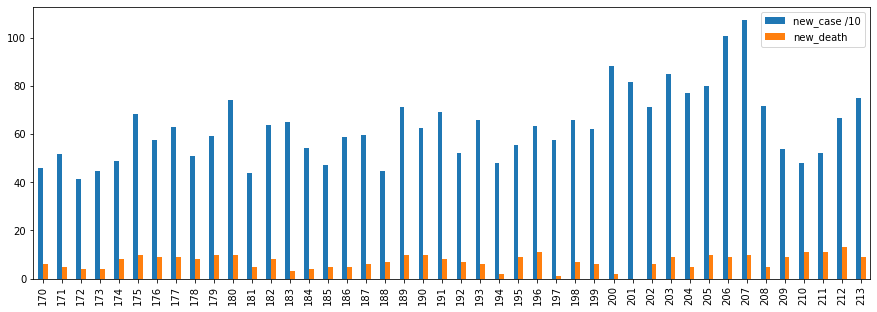

In [19]:
df[['new_case /10','new_death']][170:].plot.bar(figsize=(15,5))

## Section 2

In [20]:
df['month']=0
for i in range(0,len(df)):
    df['month'][i]=df['Date'][i][0:1]
for i in range(0,len(df)):
    if df['month'][i] == 1:
        if df['Date'][i][0:2] == '11':
            df['month'][i]=11
        else:
            df['month'][i]=10

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [21]:
dfm = df.groupby("month")
dfm['new_case','new_death'].describe()

new_case                                                                \
         count        mean         std    min     25%    50%     75%     max   
month                                                                          
4         17.0   15.294118   11.173432    4.0    6.00   15.0   19.00    49.0   
5         31.0   26.096774   13.103065    2.0   16.00   26.0   37.00    50.0   
6         30.0   36.200000   13.283124    6.0   26.75   35.5   46.75    57.0   
7         31.0   52.161290   16.190731   19.0   43.50   50.0   64.00    85.0   
8         31.0  179.096774   56.268022   76.0  140.00  177.0  223.00   291.0   
9         30.0  326.333333  100.216432  139.0  274.00  304.5  380.00   549.0   
10        31.0  582.322581  105.344637  414.0  498.50  589.0  644.00   883.0   
11        13.0  746.615385  175.176358  482.0  668.00  749.0  817.00  1074.0   

      new_death                                                 
          count      mean       std  min  25%  50%   75%   max  
month                                                           
4          17.0  0.470588  0.624264  0.0  0.0  0.0   1.0   2.0  
5          31.0  1.645161  0.877435  0.0  1.0  1.0   2.0   3.0  
6          30.0  1.666667  0.844182  1.0  1.0  1.0   2.0   4.0  
7          31.0  1.741935  1.124507  0.0  1.0  1.0   2.0   5.0  
8          31.0  2.677419  1.491914  1.0  1.0  2.0   4.0   5.0  
9          30.0  4.900000  1.988762  1.0  4.0  5.0   6.0   9.0  
10         31.0  6.612903  2.716338  1.0  5.0  7.0   9.0  11.0  
11         13.0  8.230769  3.419402  0.0  6.0  9.0  10.0  13.0

In [22]:
dfx = df.pivot_table(index='month')
dfx

,Day,new_case,new_case /10,new_death,new_recovered,total_case,total_death,total_recovered
month,,,,,,,,
4,8.0,15.294118,1.529412,0.470588,2.888889,126.470588,2.529412,13.111111
5,32.0,26.096774,2.609677,1.645161,15.280000,731.354839,26.677419,147.480000
6,62.5,36.200000,3.620000,1.666667,23.200000,1621.433333,63.233333,768.533333
7,93.0,52.161290,5.216129,1.741935,34.548387,2926.225806,111.064516,1601.838710
8,124.0,179.096774,17.909677,2.677419,36.500000,6333.774194,164.903226,2718.966667
9,154.5,326.333333,32.633333,4.900000,49.681818,13935.133333,282.033333,3848.545455
10,185.0,582.322581,58.232258,6.612903,82.840000,28031.806452,443.838710,5332.560000
11,207.0,746.615385,74.661538,8.230769,NaN,42685.692308,580.230769,NaN


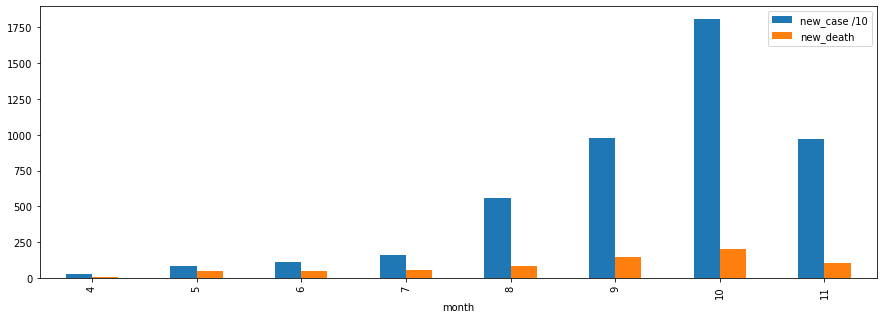

In [23]:
dfm[['new_case /10','new_death']].sum().plot.bar(figsize=(15,5))

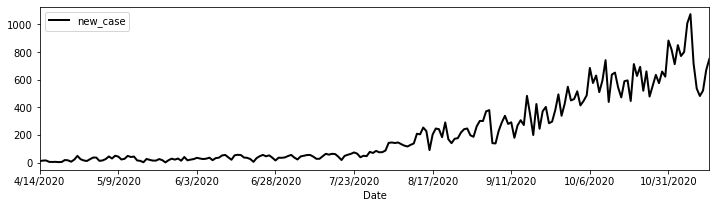

In [24]:
df.plot.line(x='Date',y='new_case',figsize=(12,3),lw=2,color='black')

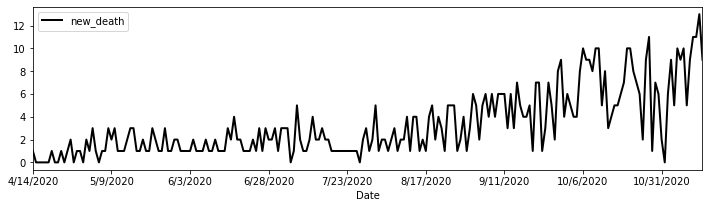

In [25]:
df.plot.line(x='Date',y='new_death',figsize=(12,3),lw=2,color='black')

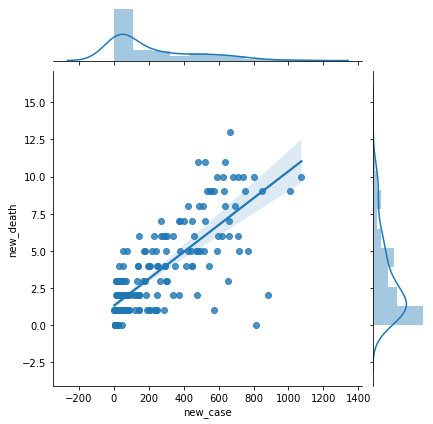

In [26]:
sns.jointplot(x='new_case',y='new_death',data=df,kind='reg')

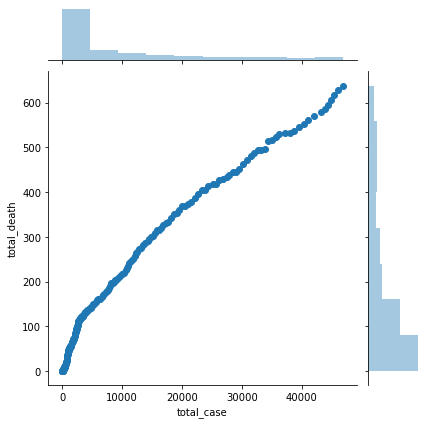

In [27]:
sns.jointplot(x='total_case',y='total_death',data=df,kind='scatter')

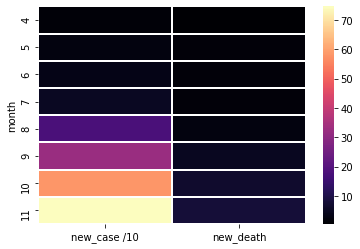

In [28]:
sns.heatmap(dfx[['new_case /10','new_death']],cmap='magma',linecolor='white',linewidths=1)

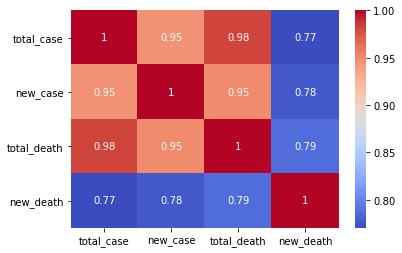

In [29]:
sns.heatmap(df[['total_case','new_case','total_death','new_death']].corr(),cmap='coolwarm',annot=True)

In [30]:
dict = {'Date':['11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020','11/22/2020'],'total_case':[48586,49067,49618,50252,50784,51398,51637],'new_case':[407,481,551,634,532,614,239]}

In [31]:
data= pd.DataFrame(data=dict)
data.index = np.arange(216,223)

## Section 3

#### Linear Regression using 2 columns as features (Day and Total Cases)

Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df[['Day','total_case']]
y = df['new_case']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# print the intercept
print(lm.intercept_)

-18.484774990976916


In [39]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Day,0.697186
total_case,0.015685


In [40]:
predictions = lm.predict(X_test)

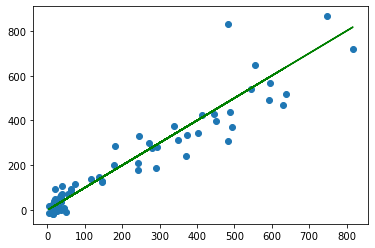

In [41]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

## Regression Evaluation Metrics


Here are two most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n \frac{|y_i-\hat{y}_i|}{y_i}$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n \frac{(y_i-\hat{y}_i)^2}{y_i}} $$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [42]:
from sklearn import metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)/100,'%')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))/100,'%')

MAE: 0.44440384454896903 %
RMSE: 0.7005862583127996 %


> Even if the error here is low but we can't use this model, because we are using total cases to predict new cases which is something far from the reality. By conclusion, not everytime we find a high correlation between two columns that's mean that we arrived to our goal.


#### Linear Regression using 'Day' as a feature and NEW CASES as a target

In [44]:
X = df[['Day']]
y = df['new_case']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=101)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lm = LinearRegression()

In [48]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# print the intercept
print(lm.intercept_)

-156.1858045405729


In [50]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Day,3.543821


In [51]:
predictions = lm.predict(X_test)

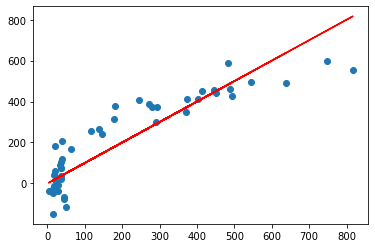

In [52]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='r')

In [53]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lm.predict(X)[i]
        s+= abs(df['new_case'][i] - y_hat)/df['new_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lm.predict(X)[i]
        s+= ((df['new_case'][i] - y_hat)/df['new_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [54]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 2.4123273086723103 %
RMSE: 5.4384951510538935 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [55]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [56]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [57]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=lm.predict([[i]])+100
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [58]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,702.191976,47588.191976
215,11/15/2020,705.735798,48293.927774
216,11/16/2020,709.279619,49003.207393
217,11/17/2020,712.823440,49716.030833
218,11/18/2020,716.367262,50432.398095
219,11/19/2020,719.911083,51152.309179
220,11/20/2020,723.454905,51875.764083
221,11/21/2020,726.998726,52602.762809
222,11/22/2020,730.542547,53333.305357


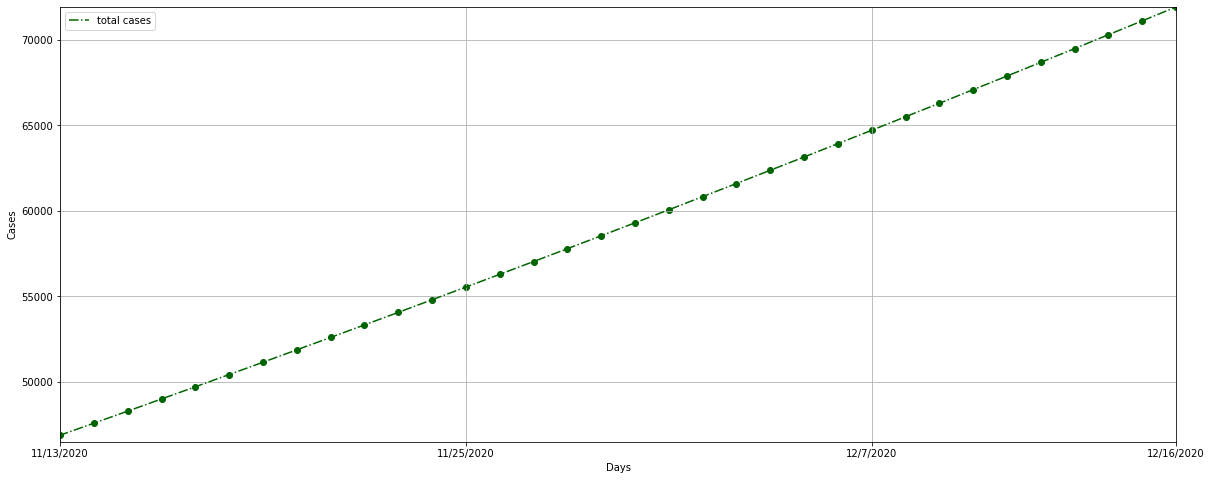

In [59]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(46500,71929)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

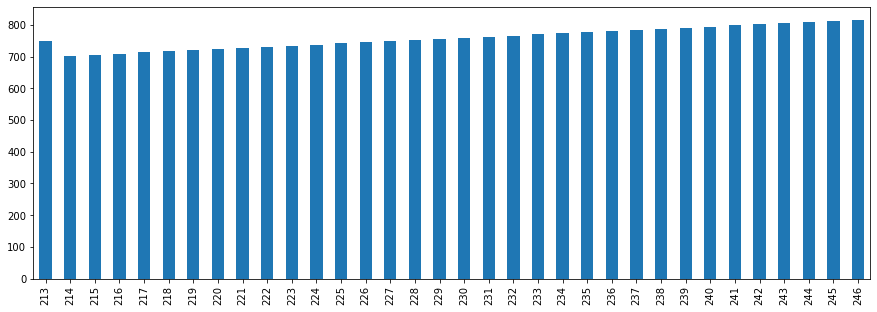

In [60]:
df['new_case'][213:].plot.bar(figsize=(15,5))

In [61]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficiency of the prognosis against real world data

In [62]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(lm.predict([[i]])[0]+100)
    list2.append((abs(data.at[i,'new_case']-list1[i-216])/data.at[i,'new_case'])*100) 

data['pred_new_case']=list1
data['error %']=list2
data[['Date','new_case','pred_new_case','error %']]

,Date,new_case,pred_new_case,error %
216,11/16/2020,407,709.279619,74.270177
217,11/17/2020,481,712.823440,48.196141
218,11/18/2020,551,716.367262,30.012207
219,11/19/2020,634,719.911083,13.550644
220,11/20/2020,532,723.454905,35.987764
221,11/21/2020,614,726.998726,18.403701
222,11/22/2020,239,730.542547,205.666338


#### Prognosis from 13/11/2020 to 31/12/2020

In [66]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [67]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [68]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=lm.predict([[i]])+100
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [70]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,702.191976,47588.191976
215,11/15/2020,705.735798,48293.927774
216,11/16/2020,709.279619,49003.207393
217,11/17/2020,712.823440,49716.030833
218,11/18/2020,716.367262,50432.398095
219,11/19/2020,719.911083,51152.309179
220,11/20/2020,723.454905,51875.764083
221,11/21/2020,726.998726,52602.762809
222,11/22/2020,730.542547,53333.305357


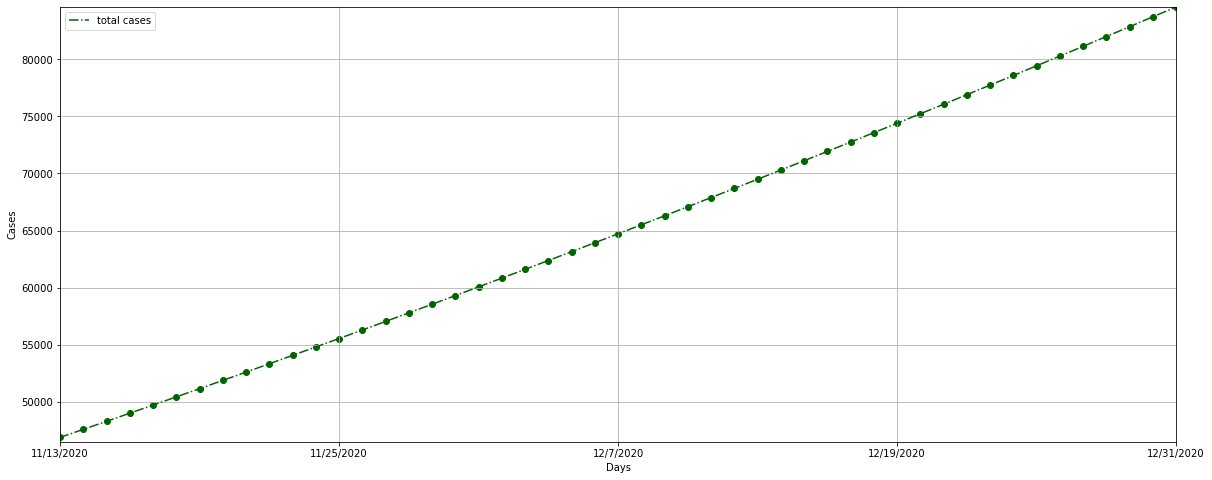

In [72]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,84588)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

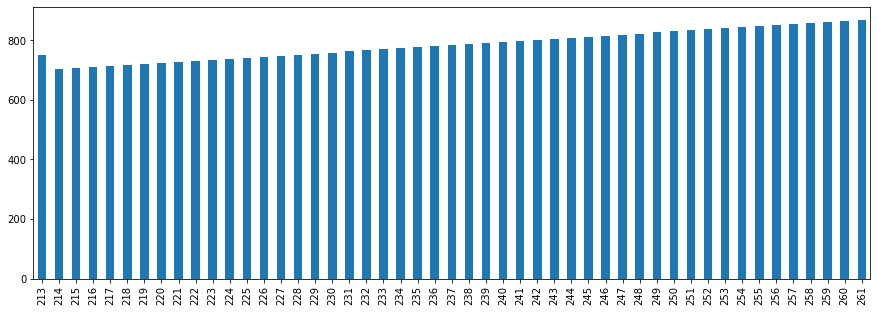

In [73]:
df['new_case'][213:].plot.bar(figsize=(15,5))

In [74]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)


#### Linear Regression using 'Day' as a feature and TOTAL CASES as a target

In [75]:
X = df[['Day']]
y = df['total_case']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=101)

In [77]:
lm = LinearRegression()

In [78]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
predictions = lm.predict(X_test)

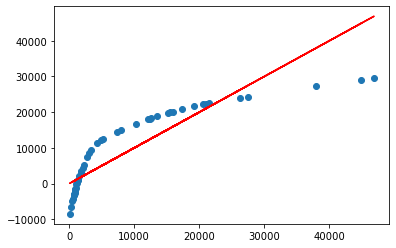

In [80]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='r')

In [81]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lm.predict(X)[i]
        s+= abs(df['total_case'][i] - y_hat)/df['total_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lm.predict(X)[i]
        s+= ((df['total_case'][i] - y_hat)/df['total_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [82]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 9.427148727006259 %
RMSE: 36.441596346701374 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [83]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [84]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [85]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=lm.predict([[i]])+17134
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [86]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.000000
214,11/14/2020,46885.097511
215,11/15/2020,47065.593702
216,11/16/2020,47246.089892
217,11/17/2020,47426.586083
218,11/18/2020,47607.082274
219,11/19/2020,47787.578465
220,11/20/2020,47968.074655
221,11/21/2020,48148.570846
222,11/22/2020,48329.067037


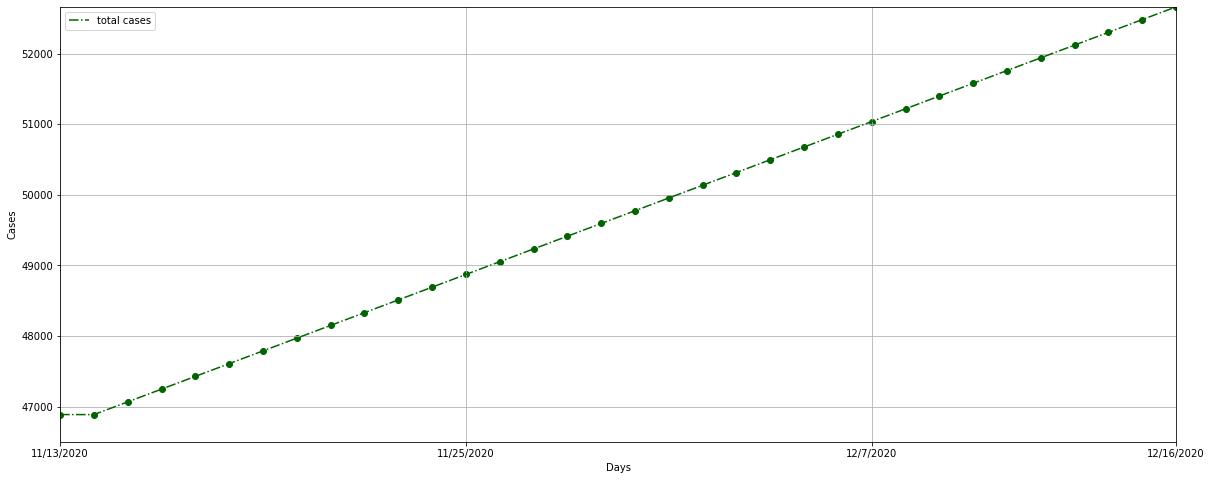

In [87]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(46500,52660)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

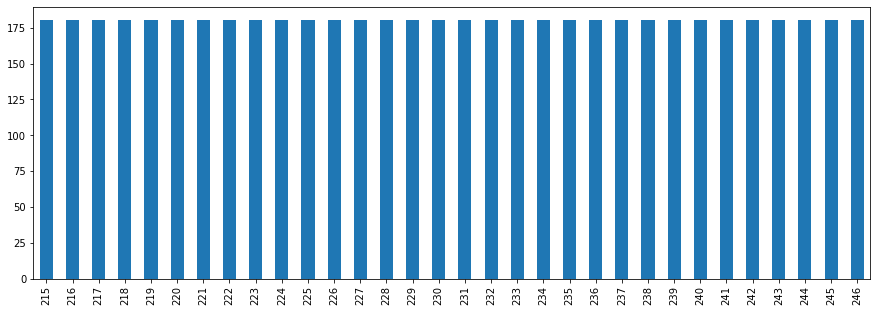

In [88]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [89]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

##### Small study of the efficiency of the prognosis against real world data

In [90]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(lm.predict([[i]])[0]+17134)
    list2.append((abs(data.at[i,'total_case']-list1[i-216])/data.at[i,'total_case'])*100) 

data['pred_total_case']=list1
data['error %']=list2
data[['Date','total_case','pred_total_case','error %']]

,Date,total_case,pred_total_case,error %
216,11/16/2020,48586,47246.089892,2.757811
217,11/17/2020,49067,47426.586083,3.343212
218,11/18/2020,49618,47607.082274,4.052799
219,11/19/2020,50252,47787.578465,4.904126
220,11/20/2020,50784,47968.074655,5.544907
221,11/21/2020,51398,48148.570846,6.322093
222,11/22/2020,51637,48329.067037,6.406129


#### Prognosis from 13/11/2020 to 31/12/2020

In [91]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [92]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [93]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=lm.predict([[i]])+17134
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [94]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.000000
214,11/14/2020,46885.097511
215,11/15/2020,47065.593702
216,11/16/2020,47246.089892
217,11/17/2020,47426.586083
218,11/18/2020,47607.082274
219,11/19/2020,47787.578465
220,11/20/2020,47968.074655
221,11/21/2020,48148.570846
222,11/22/2020,48329.067037


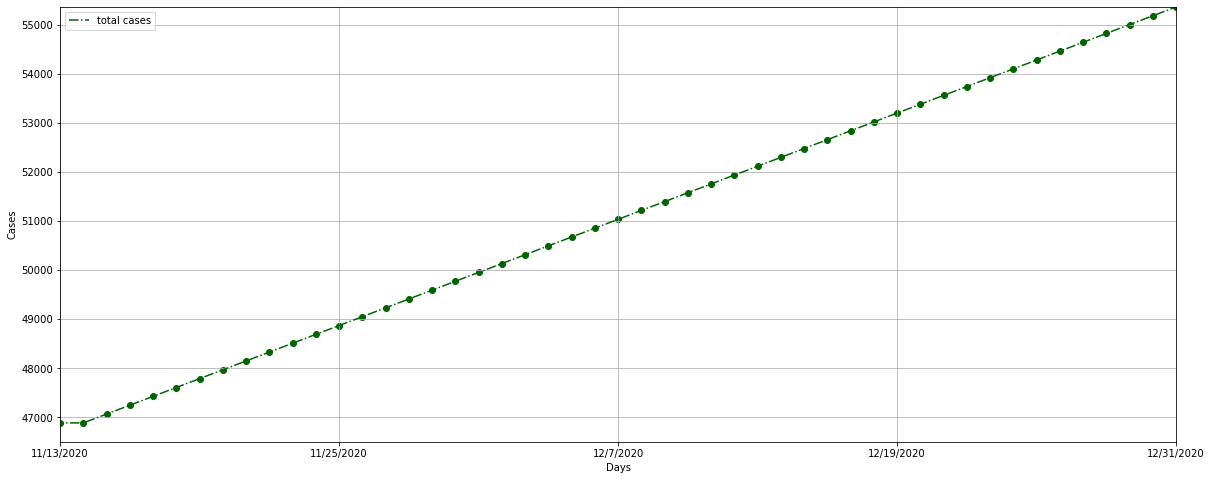

In [96]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,55368)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

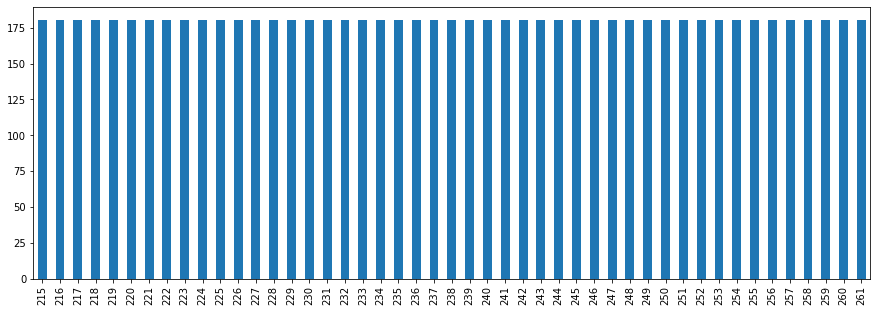

In [98]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [99]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

> We can see here that the error is very big if we want to predict the new cases using ONLY the column of Day. And we can deduce that <b>THE NON LINEAR REGRESSION MODEL IS BETTER THAN LINEAR REGRESSION</b>. We will verify this statement in the next section.

## Section 4

#### Non Linear Regression using 'Day' as a feature and NEW CASES as a target

The goal of regression analysis is to model the expected value of a dependent variable y in terms of the value of an independent variable (or vector of independent variables) x. In simple linear regression, the model

$$ y=\beta _{0}+\beta _{1}x+\varepsilon $$ 
is used, where ε is an unobserved random error with mean zero conditioned on a scalar variable x. In this model, for each unit increase in the value of x, the conditional expectation of y increases by β1 units.

In many settings, such a linear relationship may not hold. For example, if we are modeling the yield of a chemical synthesis in terms of the temperature at which the synthesis takes place, we may find that the yield improves by increasing amounts for each unit increase in temperature. In this case, we might propose a quadratic model of the form

$$ y=\beta _{0}+\beta _{1}x+\beta _{2}x^{2}+\varepsilon $$
In this model, when the temperature is increased from x to x + 1 units, the expected yield changes by  $$ \beta _{1}+\beta _{2}(2x+1). $$(This can be seen by replacing x in this equation with x+1 and subtracting the equation in x from the equation in x+1). For infinitesimal changes in x, the effect on y is given by the total derivative with respect to x: $$ \beta _{1}+2\beta _{2}x.$$The fact that the change in yield depends on x is what makes the relationship between x and y nonlinear even though the model is linear in the parameters to be estimated.

In general, we can model the expected value of y as an nth degree polynomial, yielding the general polynomial regression model

$$ y=\beta _{0}+\beta _{1}x+\beta _{2}x^{2}+\beta _{3}x^{3}+\cdots +\beta _{n}x^{n}+\varepsilon$$
Conveniently, these models are all linear from the point of view of estimation, since the regression function is linear in terms of the unknown parameters β0, β1, .... Therefore, for least squares analysis, the computational and inferential problems of polynomial regression can be completely addressed using the techniques of multiple regression. This is done by treating x, x2, ... as being distinct independent variables in a multiple regression model.

In [100]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

In [101]:
from sklearn.preprocessing import PolynomialFeatures

In [102]:
from sklearn.pipeline import make_pipeline

In [103]:
def MAE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = polyreg.predict(X)[i]
        s+= abs(df['new_case'][i] - y_hat)
    return s/len(df)

In [104]:
X = df[['Day']]
y = df['new_case']

In [105]:
error=[]
for i in range(19,40):
    polynom = PolynomialFeatures(i)
    polyreg=make_pipeline(polynom,LinearRegression())
    polyreg.fit(X,y)
    error.append(MAE(df)/100)

x=min(error)
print("The Best degree of polynom is ",error.index(x)+19)

The Best degree of polynom is  19


In [106]:
polynom = PolynomialFeatures(19)

In [107]:
polyreg=make_pipeline(polynom,LinearRegression())

In [108]:
polyreg.fit(X,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=19, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [109]:
X_seq = np.linspace(X.min(),X.max(),len(df)).reshape(-1,1)

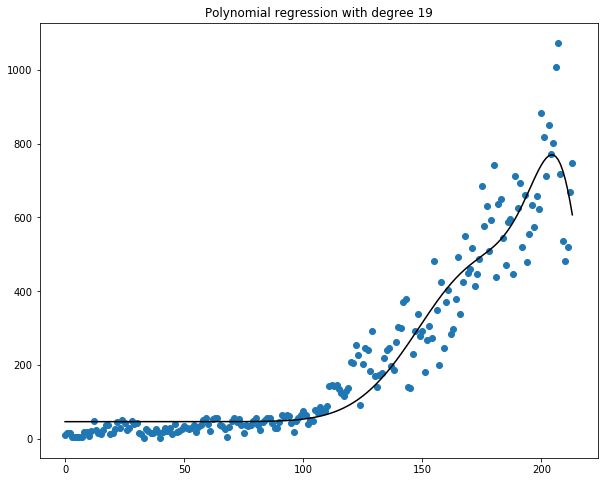

In [110]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(19))
plt.show()

In [111]:
polynom.get_params(deep=True)

{'degree': 19, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

## Regression Evaluation Metrics


Here are two most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n \frac{|y_i-\hat{y}_i|}{y_i}$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n \frac{(y_i-\hat{y}_i)^2}{y_i}} $$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [112]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = polyreg.predict(X)[i]
        s+= abs(df['new_case'][i] - y_hat)/df['new_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = polyreg.predict(X)[i]
        s+= ((df['new_case'][i] - y_hat)/df['new_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [113]:
print("MAE using non linear regression = ",MAPE(df),"%")
print("RMSE using non linear regression = ",RMSPE(df),"%")

MAE using non linear regression =  0.863459796239153 %
RMSE using non linear regression =  2.3996132075698293 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [114]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [115]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [116]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=polyreg.predict([[i]])
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i-1,'new_case']

In [117]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,566.972854,47635.000000
215,11/15/2020,524.338891,48201.972854
216,11/16/2020,481.198041,48726.311745
217,11/17/2020,439.963954,49207.509786
218,11/18/2020,403.820699,49647.473740
219,11/19/2020,376.873575,50051.294439
220,11/20/2020,364.322146,50428.168014
221,11/21/2020,372.658156,50792.490160
222,11/22/2020,409.891226,51165.148316


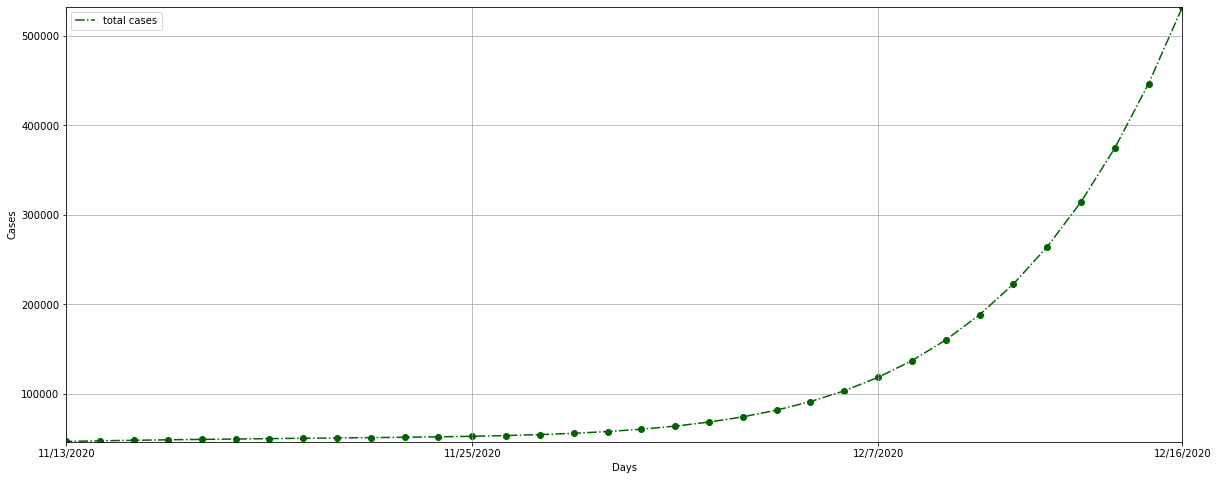

In [118]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(46500,532439)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

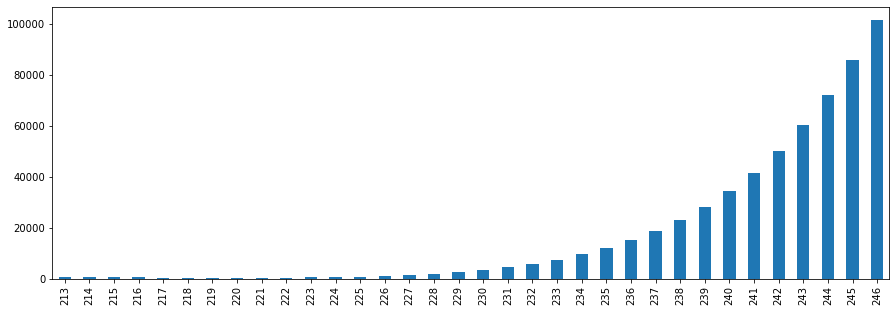

In [119]:
df['new_case'][213:].plot.bar(figsize=(15,5))

##### Small study of the efficiency of the prognosis against real world data

In [120]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(polyreg.predict([[i]])[0])
    list2.append((abs(data.at[i,'new_case']-list1[i-216])/data.at[i,'new_case'])*100) 

data['pred_new_case']=list1
data['error %']=list2
data[['Date','new_case','pred_new_case','error %']]

,Date,new_case,pred_new_case,error %
216,11/16/2020,407,481.198041,18.230477
217,11/17/2020,481,439.963954,8.531403
218,11/18/2020,551,403.820699,26.711307
219,11/19/2020,634,376.873575,40.556218
220,11/20/2020,532,364.322146,31.518394
221,11/21/2020,614,372.658156,39.306489
222,11/22/2020,239,409.891226,71.502605


In [121]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [122]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [123]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [124]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=polyreg.predict([[i]])
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i-1,'new_case']

In [125]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,4.688600e+04
214,11/14/2020,566.972854,4.763500e+04
215,11/15/2020,524.338891,4.820197e+04
216,11/16/2020,481.198041,4.872631e+04
217,11/17/2020,439.963954,4.920751e+04
218,11/18/2020,403.820699,4.964747e+04
219,11/19/2020,376.873575,5.005129e+04
220,11/20/2020,364.322146,5.042817e+04
221,11/21/2020,372.658156,5.079249e+04
222,11/22/2020,409.891226,5.116515e+04


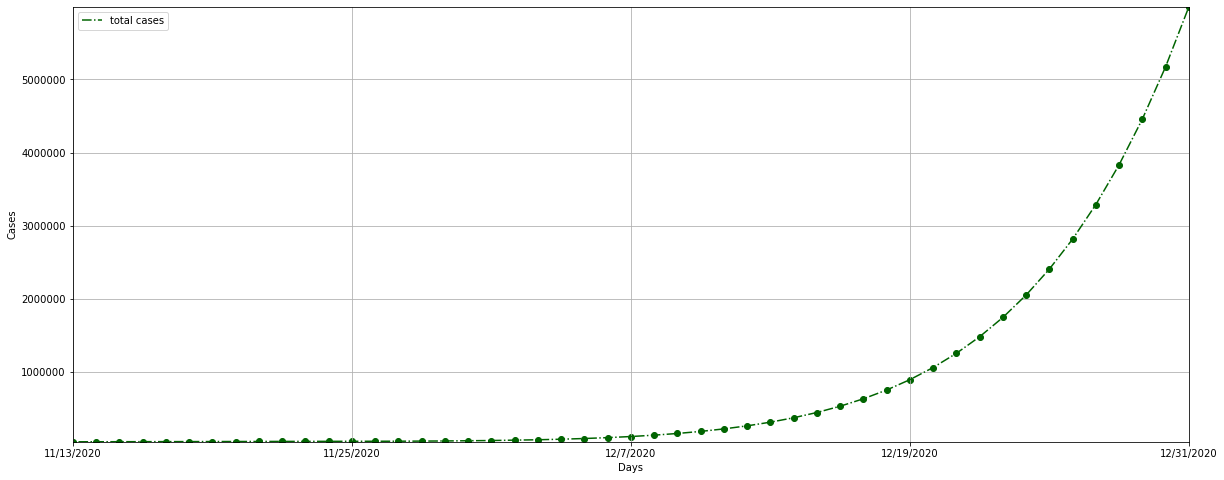

In [127]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,5990600)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

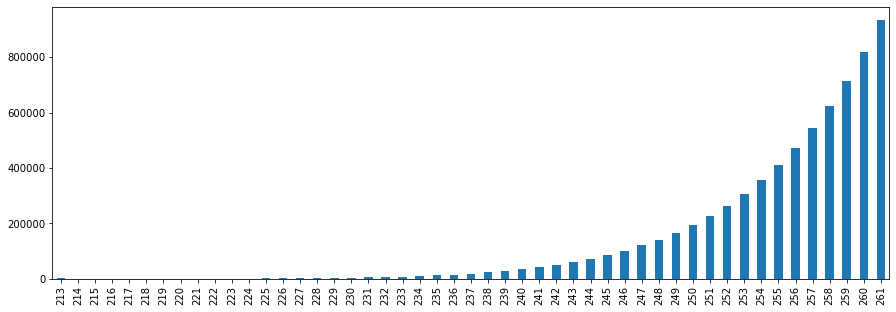

In [128]:
df['new_case'][213:].plot.bar(figsize=(15,5))

In [129]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Non Linear Regression using 'Day' as a feature and TOTAL CASES as a target

In [130]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

In [131]:
X = df[['Day']]
y = df['total_case']

In [132]:
def MAE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = polyreg.predict(X)[i]
        s+= abs(df['total_case'][i] - y_hat)
    return s/len(df)

In [133]:
error=[]
for i in range(3,50):
    polynom = PolynomialFeatures(i)
    polyreg=make_pipeline(polynom,LinearRegression())
    polyreg.fit(X,y)
    error.append(MAE(df)/100)

x=min(error)
print("The Best degree of polynom is ",error.index(x)+3)

The Best degree of polynom is  6


In [134]:
polynom = PolynomialFeatures(6)

In [135]:
polyreg=make_pipeline(polynom,LinearRegression())

In [136]:
polyreg.fit(X,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=6, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [137]:
X_seq = np.linspace(X.min(),X.max(),len(df)).reshape(-1,1)

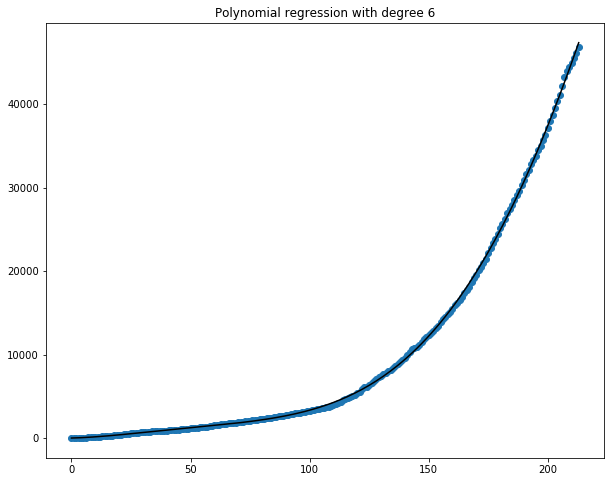

In [138]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(6))
plt.show()

In [139]:
polynom.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6']

In [140]:
polynom.get_params(deep=True)

{'degree': 6, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

In [141]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = polyreg.predict(X)[i]
        s+= abs(df['total_case'][i] - y_hat)/df['total_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = polyreg.predict(X)[i]
        s+= ((df['total_case'][i] - y_hat)/df['total_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [142]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 0.04137350114666631 %
RMSE: 0.07555712263806794 %


###### Prognosis from 14/11/2020 to 16/12/2020

In [143]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [144]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [146]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=polyreg.predict([[i]])+417
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [147]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,1695.848233,48581.848233
215,11/15/2020,829.167380,49411.015612
216,11/16/2020,836.878323,50247.893936
217,11/17/2020,844.512145,51092.406081
218,11/18/2020,852.064979,51944.471060
219,11/19/2020,859.532910,52804.003970
220,11/20/2020,866.911968,53670.915938
221,11/21/2020,874.198134,54545.114073
222,11/22/2020,881.387336,55426.501409


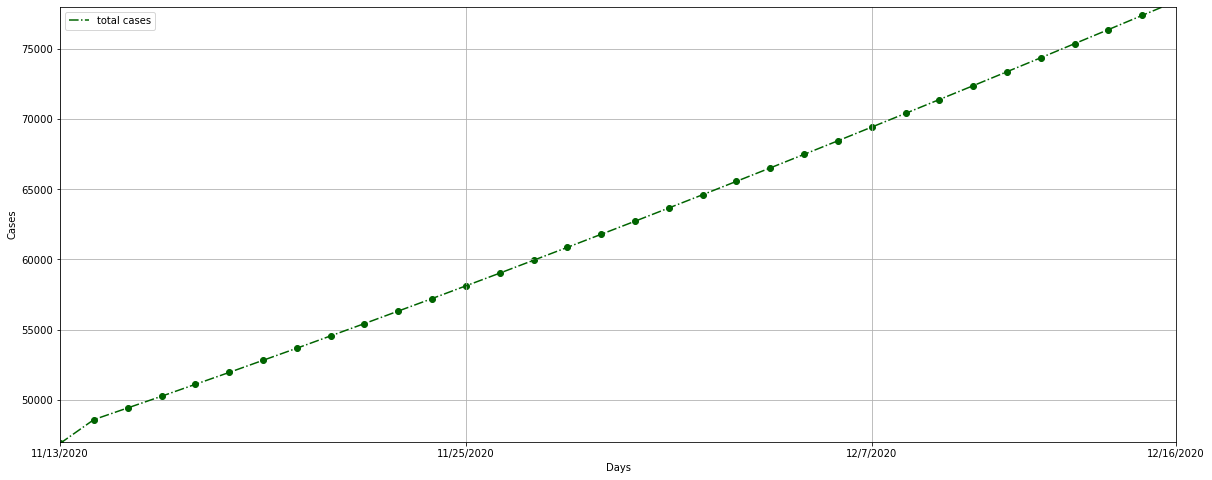

In [148]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(47000,78000)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

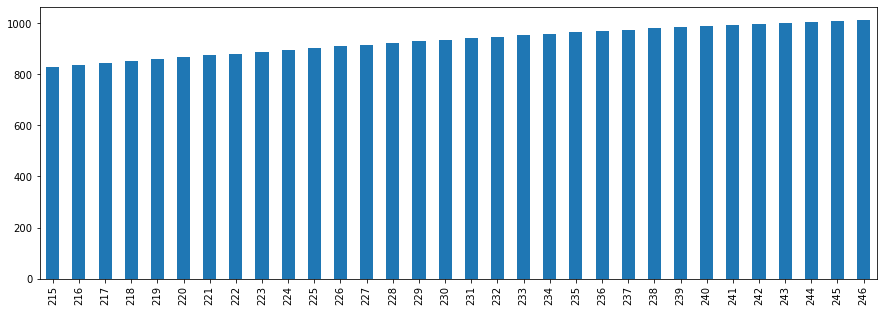

In [149]:
df['new_case'][215:].plot.bar(figsize=(15,5))

##### Small study of the efficiency of the prognosis against real world data

In [150]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(polyreg.predict([[i]])[0]+417)
    list2.append((abs(data.at[i,'total_case']-list1[i-216])/data.at[i,'total_case'])*100) 

data['pred_total_case']=list1
data['error %']=list2
data[['Date','total_case','pred_total_case','error %']]

,Date,total_case,pred_total_case,error %
216,11/16/2020,48586,50247.893936,3.420520
217,11/17/2020,49067,51092.406081,4.127838
218,11/18/2020,49618,51944.471060,4.688764
219,11/19/2020,50252,52804.003970,5.078413
220,11/20/2020,50784,53670.915938,5.684696
221,11/21/2020,51398,54545.114073,6.123028
222,11/22/2020,51637,55426.501409,7.338733


In [151]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [152]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [153]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [154]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=polyreg.predict([[i]])+417
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [155]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,1695.848233,48581.848233
215,11/15/2020,829.167380,49411.015612
216,11/16/2020,836.878323,50247.893936
217,11/17/2020,844.512145,51092.406081
218,11/18/2020,852.064979,51944.471060
219,11/19/2020,859.532910,52804.003970
220,11/20/2020,866.911968,53670.915938
221,11/21/2020,874.198134,54545.114073
222,11/22/2020,881.387336,55426.501409


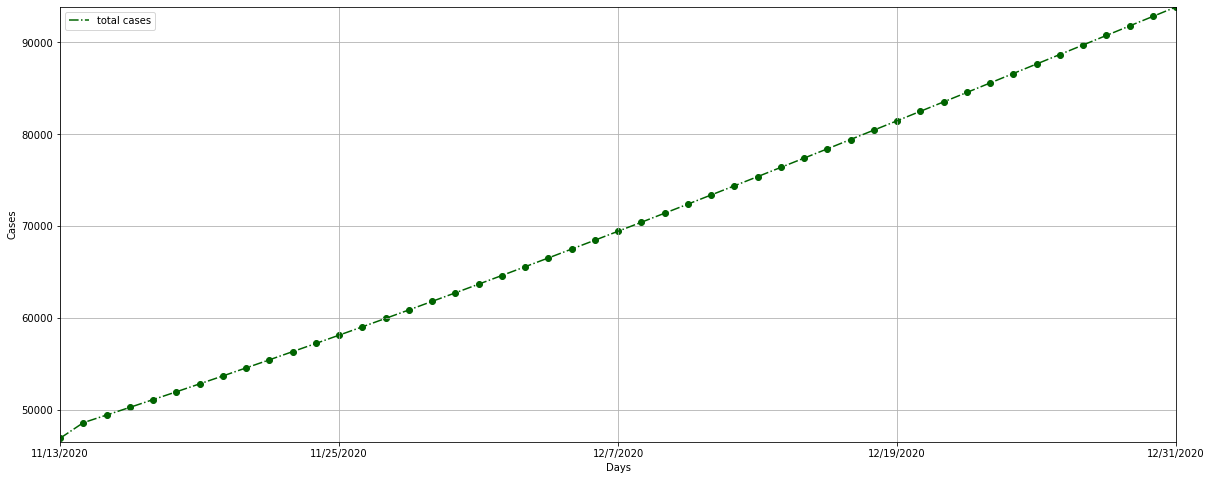

In [156]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,93867)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

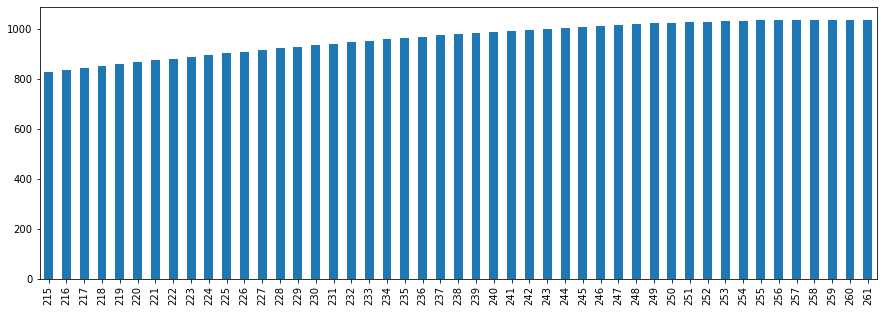

In [158]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [159]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

## Section 5

#### Lasso Regression using 'Day' as a feature and NEW CASES as a target

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.

Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models. On the other hand, L2 regularization (e.g. Ridge regression) doesn’t result in elimination of coefficients or sparse models. This makes the Lasso far easier to interpret than the Ridge.

The optimization objective for Lasso is:

$$(1 / (2 * n_{samples})) * ||y - Xw||^2_2 + alpha * ||w||_1$$
Technically the Lasso model is optimizing the same objective function as the Elastic Net with l1_ratio=1.0 (no L2 penalty).

In [160]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

In [161]:
X = df[['Day']]
y = df['new_case']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [163]:
from sklearn.linear_model import Lasso

In [164]:
lr = Lasso()

In [165]:
lr.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [166]:
predictions = lr.predict(X_test)

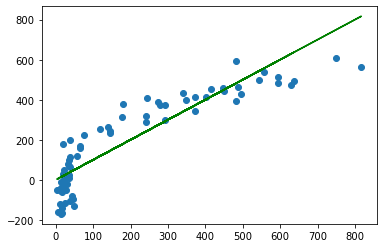

In [167]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [168]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lr.predict(X)[i]
        s+= abs(df['new_case'][i] - y_hat)/df['new_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lr.predict(X)[i]
        s+= ((df['new_case'][i] - y_hat)/df['new_case'][i])**2
    return s/len(df)

In [169]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 2.6412937103754004 %
RMSE: 6.116881287561146 %


Some of the predicted values are negative, let's verify it

The Lasso Regression fits the following equation: $$\hat{y} = ax + b$$
Where:
$$a= 3.66$$
$$b= -174.12$$
$$x= Day$$
$$\hat{y}= prediction$$

In [170]:
print("The coefficient of the regression is:",lr.coef_[0])
print("The intercept of the regression is:",lr.intercept_)

The coefficient of the regression is: 3.663753316380567
The intercept of the regression is: -174.12215706139347


In [171]:
print("The number of new cases in the day 0 are:",df['new_case'][0])
print("The PREDICTED new cases in the day 0 are:",df['Day'][0]*lr.coef_[0] + lr.intercept_)

The number of new cases in the day 0 are: 11.0
The PREDICTED new cases in the day 0 are: -174.12215706139347


In [172]:
print("The number of new cases in the day 5 are:",df['new_case'][5])
print("The PREDICTED new cases in the day 5 are:",df['Day'][5]*lr.coef_[0] + lr.intercept_)

The number of new cases in the day 5 are: 6.0
The PREDICTED new cases in the day 5 are: -155.80339047949064


In [173]:
print("The number of new cases in the day 10 are:",df['new_case'][10])
print("The PREDICTED new cases in the day 10 are:",df['Day'][10]*lr.coef_[0] + lr.intercept_)

The number of new cases in the day 10 are: 7.0
The PREDICTED new cases in the day 10 are: -137.4846238975878


In [174]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [175]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [176]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=lr.predict([[i]])
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [177]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,609.921053,47495.921053
215,11/15/2020,613.584806,48109.505859
216,11/16/2020,617.248559,48726.754418
217,11/17/2020,620.912313,49347.666730
218,11/18/2020,624.576066,49972.242796
219,11/19/2020,628.239819,50600.482616
220,11/20/2020,631.903573,51232.386188
221,11/21/2020,635.567326,51867.953514
222,11/22/2020,639.231079,52507.184593


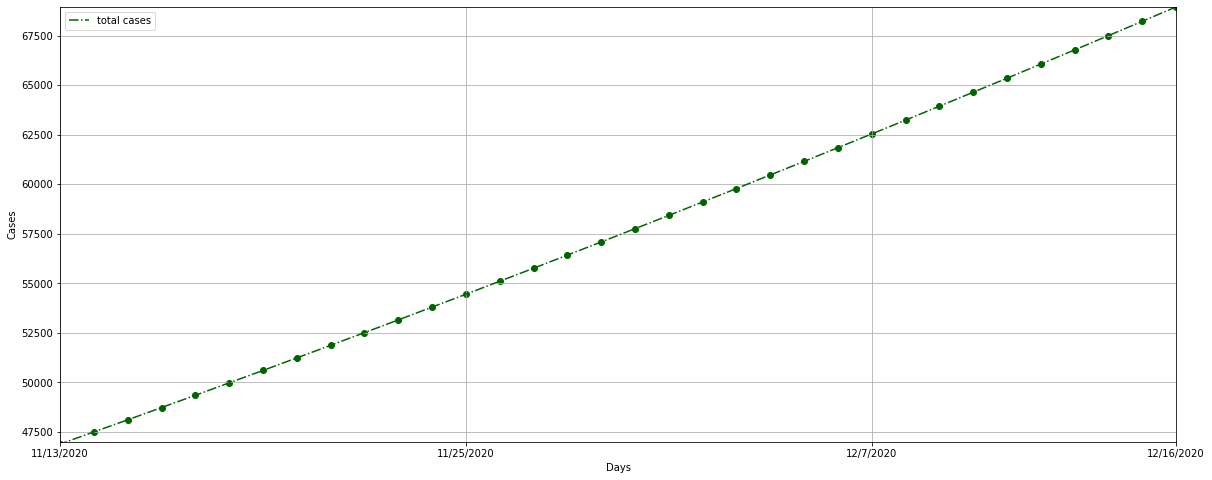

In [178]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(47000,68947)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

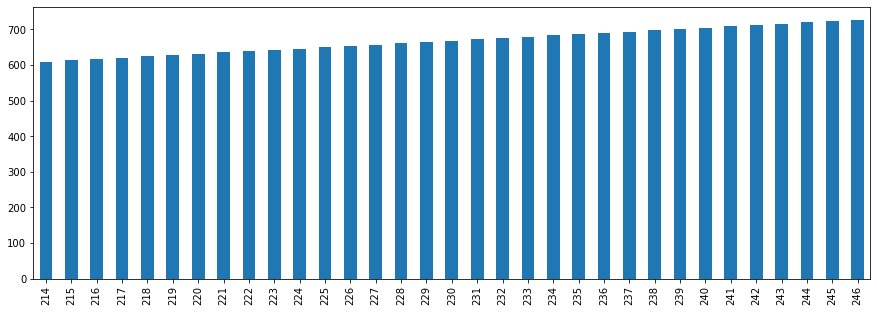

In [179]:
df['new_case'][214:].plot.bar(figsize=(15,5))

In [180]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

In [181]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(lr.predict([[i]])[0])
    list2.append((abs(data.at[i,'new_case']-list1[i-216])/data.at[i,'new_case'])*100) 

data['pred_new_case']=list1
data['error %']=list2
data[['Date','new_case','pred_new_case','error %']]

,Date,new_case,pred_new_case,error %
216,11/16/2020,407,617.248559,51.658123
217,11/17/2020,481,620.912313,29.087799
218,11/18/2020,551,624.576066,13.353188
219,11/19/2020,634,628.239819,0.908546
220,11/20/2020,532,631.903573,18.778867
221,11/21/2020,614,635.567326,3.512594
222,11/22/2020,239,639.231079,167.460703


In [182]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [183]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [184]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [185]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=lr.predict([[i]])
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [187]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,609.921053,47495.921053
215,11/15/2020,613.584806,48109.505859
216,11/16/2020,617.248559,48726.754418
217,11/17/2020,620.912313,49347.666730
218,11/18/2020,624.576066,49972.242796
219,11/19/2020,628.239819,50600.482616
220,11/20/2020,631.903573,51232.386188
221,11/21/2020,635.567326,51867.953514
222,11/22/2020,639.231079,52507.184593


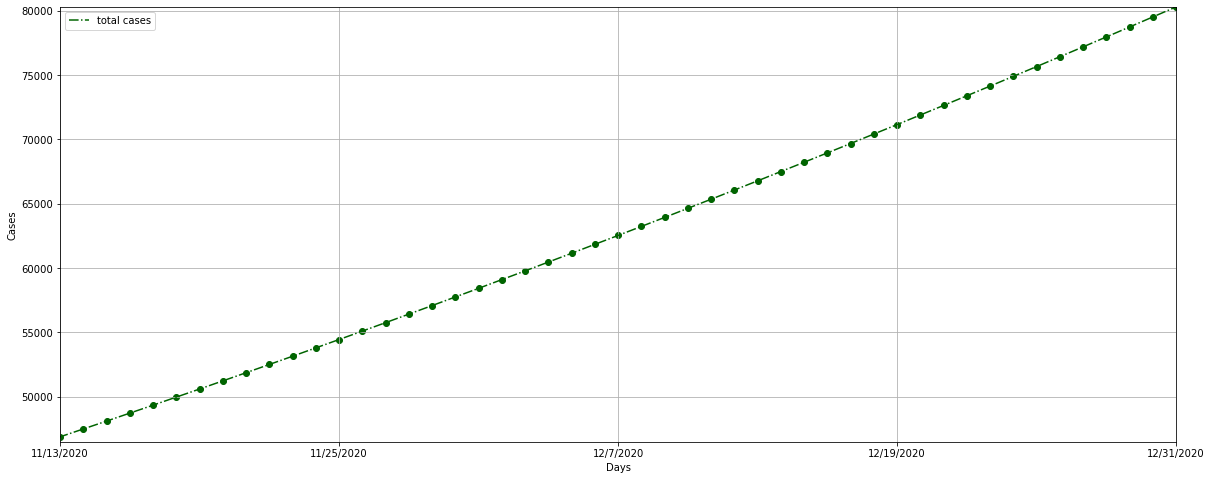

In [188]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,80294)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

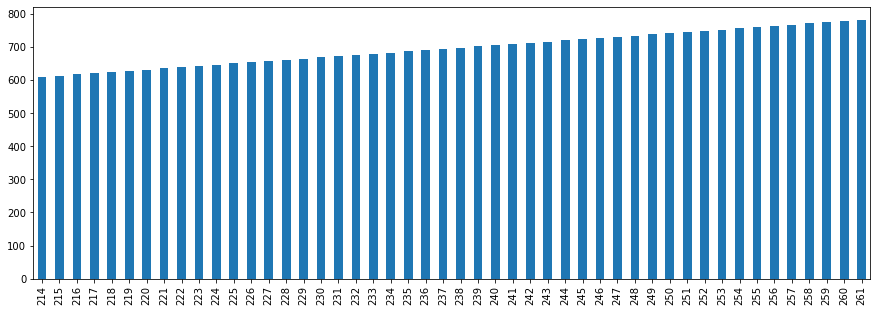

In [190]:
df['new_case'][214:].plot.bar(figsize=(15,5))

In [191]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Lasso Regression using 'Day' as a feature and TOTAL CASES as a target

In [192]:
X = df[['Day']]
y = df['total_case']

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [194]:
lr = Lasso()

In [195]:
lr.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [196]:
predictions = lr.predict(X_test)

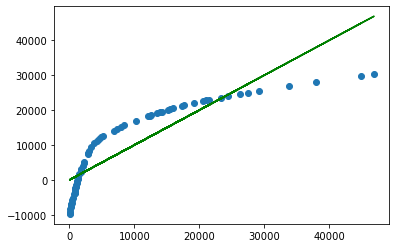

In [197]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [198]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lr.predict(X)[i]
        s+= abs(df['total_case'][i] - y_hat)/df['total_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = lr.predict(X)[i]
        s+= ((df['total_case'][i] - y_hat)/df['total_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [199]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 10.574409591783436 %
RMSE: 40.85876043105436 %


Some of the predicted values are negative, let's verify it

The Lasso Regression fits the following equation: $$\hat{y} = ax + b$$
Where:
$$a= 189.14$$
$$b= -9924.41$$
$$x= Day$$
$$\hat{y}= prediction$$

In [200]:
print("The coefficient of the regression is:",lr.coef_[0])
print("The intercept of the regression is:",lr.intercept_)

The coefficient of the regression is: 189.14830556180073
The intercept of the regression is: -9924.411010205797


In [201]:
print("The number of new cases in the day 0 are:",df['new_case'][0])
print("The PREDICTED new cases in the day 0 are:",df['Day'][0]*lr.coef_[0] + lr.intercept_)

The number of new cases in the day 0 are: 11.0
The PREDICTED new cases in the day 0 are: -9924.411010205797


In [202]:
print("The number of new cases in the day 5 are:",df['new_case'][5])
print("The PREDICTED new cases in the day 5 are:",df['Day'][5]*lr.coef_[0] + lr.intercept_)

The number of new cases in the day 5 are: 6.0
The PREDICTED new cases in the day 5 are: -8978.669482396794


In [203]:
print("The number of new cases in the day 10 are:",df['new_case'][10])
print("The PREDICTED new cases in the day 10 are:",df['Day'][10]*lr.coef_[0] + lr.intercept_)

The number of new cases in the day 10 are: 7.0
The PREDICTED new cases in the day 10 are: -8032.927954587789


In [204]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [205]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [206]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=lr.predict([[i]])+16332+749
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [207]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.000000
214,11/14/2020,47634.326380
215,11/15/2020,47823.474686
216,11/16/2020,48012.622991
217,11/17/2020,48201.771297
218,11/18/2020,48390.919602
219,11/19/2020,48580.067908
220,11/20/2020,48769.216213
221,11/21/2020,48958.364519
222,11/22/2020,49147.512825


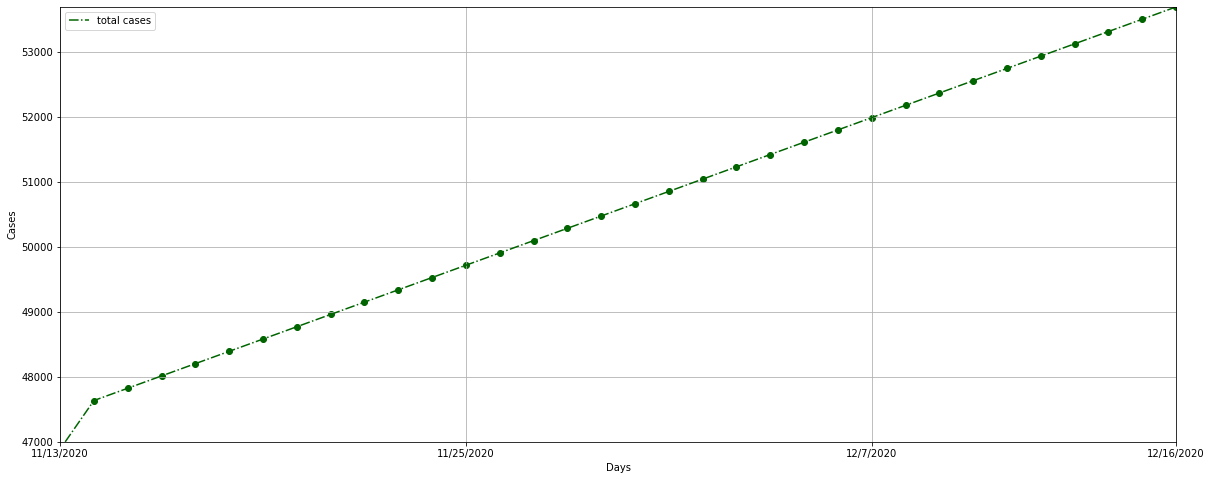

In [208]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(47000,53687)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

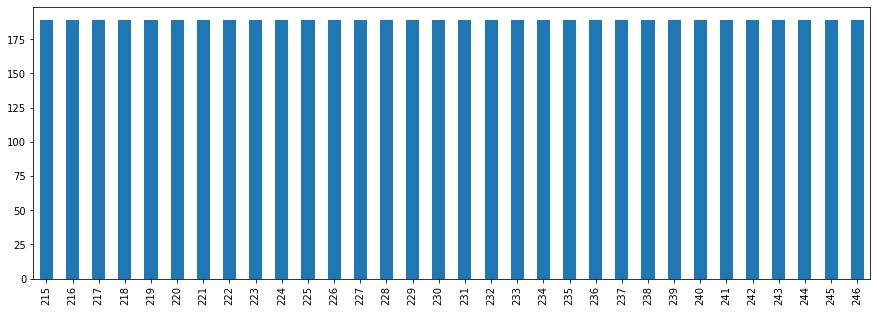

In [209]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [210]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

In [211]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(lm.predict([[i]])[0]+16332+749)
    list2.append((abs(data.at[i,'total_case']-list1[i-216])/data.at[i,'total_case'])*100) 

data['pred_total_case']=list1
data['error %']=list2
data[['Date','total_case','pred_total_case','error %']]

,Date,total_case,pred_total_case,error %
216,11/16/2020,48586,47193.089892,2.866896
217,11/17/2020,49067,47373.586083,3.451228
218,11/18/2020,49618,47554.082274,4.159615
219,11/19/2020,50252,47734.578465,5.009595
220,11/20/2020,50784,47915.074655,5.649270
221,11/21/2020,51398,48095.570846,6.425209
222,11/22/2020,51637,48276.067037,6.508769


In [212]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [213]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [214]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [215]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=lr.predict([[i]])+16332+749
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [217]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.000000
214,11/14/2020,47634.326380
215,11/15/2020,47823.474686
216,11/16/2020,48012.622991
217,11/17/2020,48201.771297
218,11/18/2020,48390.919602
219,11/19/2020,48580.067908
220,11/20/2020,48769.216213
221,11/21/2020,48958.364519
222,11/22/2020,49147.512825


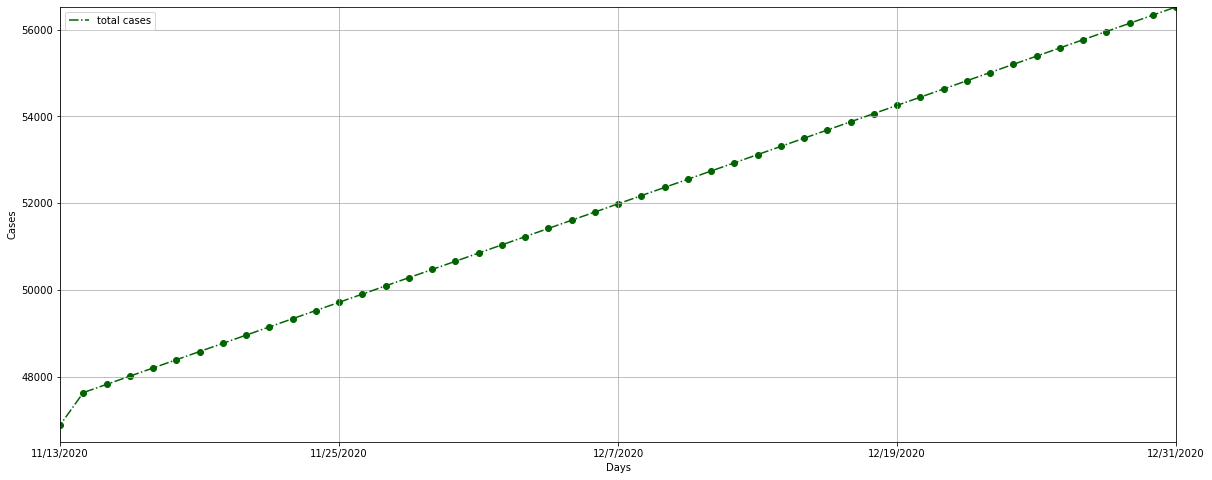

In [218]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,56524)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

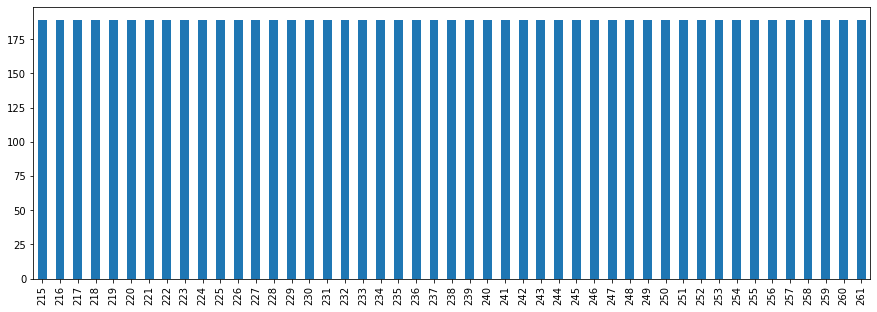

In [219]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [220]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

## Section 6

#### Ridge Regression using 'Day' as a feature and NEW CASES as a target

Ridge regression uses a type of shrinkage estimator called a ridge estimator. Shrinkage estimators theoretically produce new estimators that are shrunk closer to the “true” population parameters. The ridge estimator is especially good at improving the least-squares estimate when multicollinearity is present.

Ridge regression belongs a class of regression tools that use L2 regularization. The other type of regularization, L1 regularization, limits the size of the coefficients by adding an L1 penalty equal to the absolute value of the magnitude of coefficients. This sometimes results in the elimination of some coefficients altogether, which can yield sparse models. L2 regularization adds an L2 penalty, which equals the square of the magnitude of coefficients. All coefficients are shrunk by the same factor (so none are eliminated). Unlike L1 regularization, L2 will not result in sparse models.

A tuning parameter (λ) controls the strength of the penalty term. When λ = 0, ridge regression equals least squares regression. If λ = ∞, all coefficients are shrunk to zero. The ideal penalty is therefore somewhere in between 0 and ∞.

In the simplest case, the problem of a near-singular moment matrix $$ (\mathbf {X} ^{\mathsf {T}}\mathbf {X} )$$ is alleviated by adding positive elements to the diagonals, thereby decreasing its condition number. Analogous to the ordinary least squares estimator, the simple ridge estimator is then given by

$$ {\hat {\beta }}_{R}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} +\lambda \mathbf {I} )^{-1}\mathbf {X} ^{\mathsf {T}}\mathbf {y} $$ 
where <b>y</b> is the regressand, <b>X</b>  is the design matrix, <b>I</b>  is the identity matrix, and the ridge parameter  \lambda \geq 0 serves as the constant shifting the diagonals of the moment matrix. It can be shown that this estimator is the solution to the least squares problem subject to the constraint $$ \beta ^{\mathsf {T}}\beta =c $$ , which can be expressed as a Lagrangian:

$$ \min _{\beta }\,(\mathbf {y} -\mathbf {X} \beta )^{\mathsf {T}}(\mathbf {y} -\mathbf {X} \beta )+\lambda (\beta ^{\mathsf {T}}\beta -c)$$
which shows that λ is nothing but the Lagrange multiplier of the constraint. In the case of  λ=0, in which the constraint is non-binding, the ridge estimator reduces to ordinary least squares.
<br>Minimizes the objective function:

$$||y - Xw||^2_2 + alpha * ||w||^2_2 $$

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [221]:
X = df[['Day']]
y = df['new_case']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [223]:
from sklearn.linear_model import Ridge

In [224]:
rr = Ridge()

In [225]:
rr.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [226]:
predictions = rr.predict(X_test)

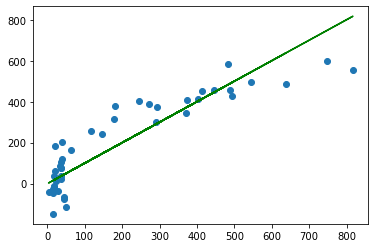

In [227]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [228]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = rr.predict(X)[i]
        s+= abs(df['new_case'][i] - y_hat)/df['new_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = rr.predict(X)[i]
        s+= ((df['new_case'][i] - y_hat)/df['new_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [229]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 2.39553171635645 %
RMSE: 5.3973098573839815 %


In [230]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [231]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [232]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=rr.predict([[i]])
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [233]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,599.636507,47485.636507
215,11/15/2020,603.162883,48088.799390
216,11/16/2020,606.689260,48695.488649
217,11/17/2020,610.215636,49305.704285
218,11/18/2020,613.742012,49919.446298
219,11/19/2020,617.268389,50536.714686
220,11/20/2020,620.794765,51157.509452
221,11/21/2020,624.321142,51781.830594
222,11/22/2020,627.847518,52409.678112


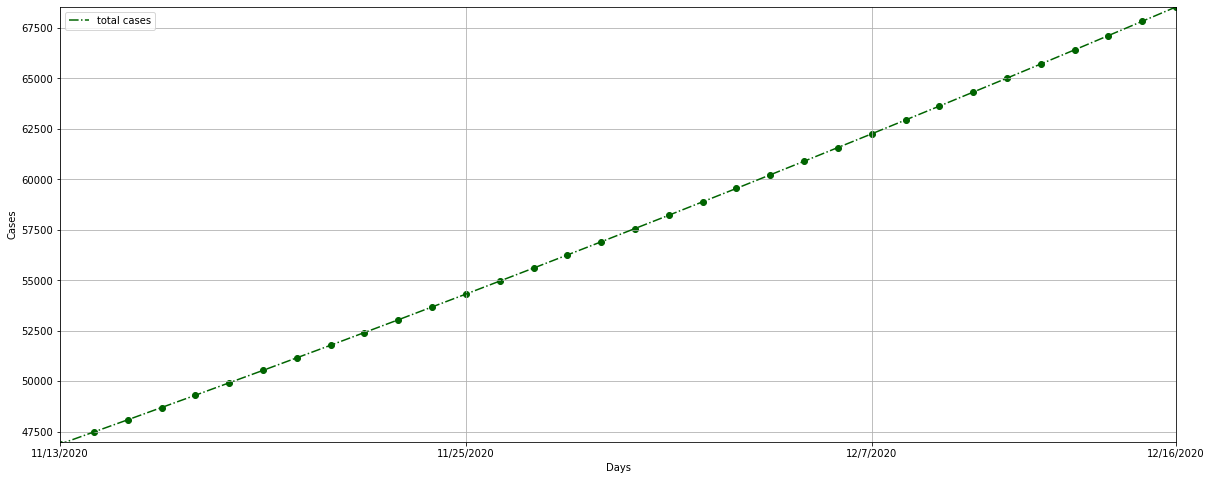

In [234]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(47000,68535)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

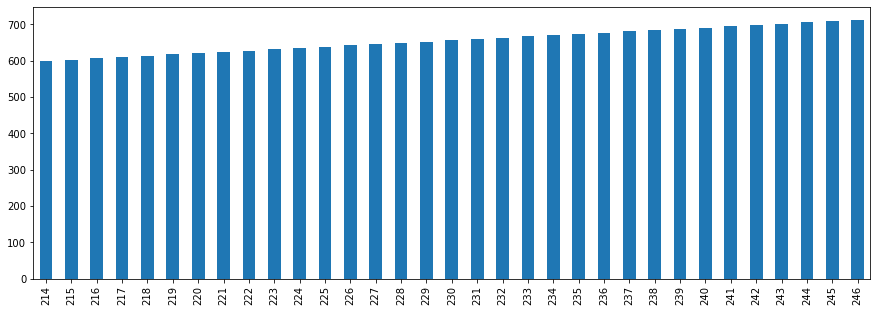

In [235]:
df['new_case'][214:].plot.bar(figsize=(15,5))

In [236]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(rr.predict([[i]])[0])
    list2.append((abs(data.at[i,'new_case']-list1[i-216])/data.at[i,'new_case'])*100) 

data['pred_new_case']=list1
data['error %']=list2
data[['Date','new_case','pred_new_case','error %']]

,Date,new_case,pred_new_case,error %
216,11/16/2020,407,606.689260,49.063700
217,11/17/2020,481,610.215636,26.863958
218,11/18/2020,551,613.742012,11.386935
219,11/19/2020,634,617.268389,2.639055
220,11/20/2020,532,620.794765,16.690745
221,11/21/2020,614,624.321142,1.680968
222,11/22/2020,239,627.847518,162.697706


In [237]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [238]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [239]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [240]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=rr.predict([[i]])
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [241]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,599.636507,47485.636507
215,11/15/2020,603.162883,48088.799390
216,11/16/2020,606.689260,48695.488649
217,11/17/2020,610.215636,49305.704285
218,11/18/2020,613.742012,49919.446298
219,11/19/2020,617.268389,50536.714686
220,11/20/2020,620.794765,51157.509452
221,11/21/2020,624.321142,51781.830594
222,11/22/2020,627.847518,52409.678112


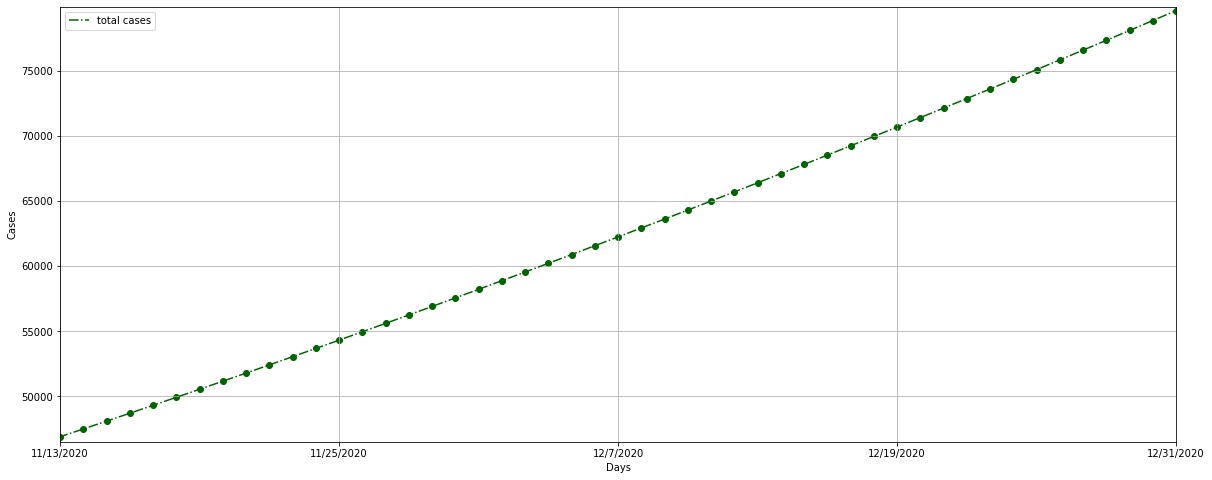

In [243]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,79929)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

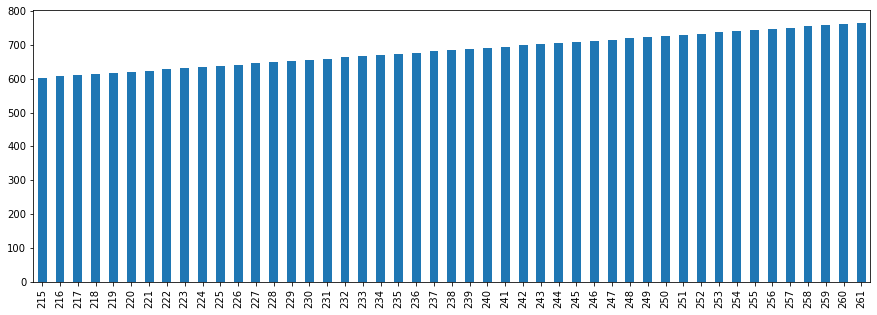

In [244]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [245]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Ridge Regression using 'Day' as a feature and TOTAL CASES as a target

In [246]:
X = df[['Day']]
y = df['total_case']

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [248]:
from sklearn.linear_model import Ridge

In [249]:
rr = Ridge()

In [250]:
rr.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [251]:
predictions = rr.predict(X_test)

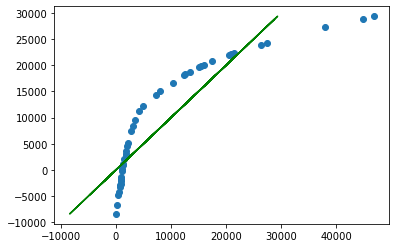

In [252]:
plt.scatter(y_test,predictions)
plt.plot(predictions,predictions,c='g')

In [253]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = rr.predict(X)[i]
        s+= abs(df['total_case'][i] - y_hat)/df['total_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = rr.predict(X)[i]
        s+= ((df['total_case'][i] - y_hat)/df['total_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [254]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 9.324358108424462 %
RMSE: 36.04781273774354 %


Some of the predicted values are negative, let's verify it

The Lasso Regression fits the following equation: $$\hat{y} = ax + b$$
Where:
$$a= 179.08$$
$$b= -8779.93$$
$$x= Day$$
$$\hat{y}= prediction$$

In [255]:
print("The coefficient of the regression is:",rr.coef_[0])
print("The intercept of the regression is:",rr.intercept_)

The coefficient of the regression is: 179.08169522289518
The intercept of the regression is: -8779.931292826004


In [256]:
print("The number of new cases in the day 0 are:",df['new_case'][0])
print("The PREDICTED new cases in the day 0 are:",df['Day'][0]*rr.coef_[0] + rr.intercept_)

The number of new cases in the day 0 are: 11.0
The PREDICTED new cases in the day 0 are: -8779.931292826004


In [257]:
print("The number of new cases in the day 5 are:",df['new_case'][5])
print("The PREDICTED new cases in the day 5 are:",df['Day'][5]*rr.coef_[0] + rr.intercept_)

The number of new cases in the day 5 are: 6.0
The PREDICTED new cases in the day 5 are: -7884.522816711528


In [258]:
print("The number of new cases in the day 10 are:",df['new_case'][10])
print("The PREDICTED new cases in the day 10 are:",df['Day'][10]*rr.coef_[0] + rr.intercept_)

The number of new cases in the day 10 are: 7.0
The PREDICTED new cases in the day 10 are: -6989.114340597052


In [259]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

In [260]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [261]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [262]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=rr.predict([[i]])+17992
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [263]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.000000
214,11/14/2020,47535.551485
215,11/15/2020,47714.633180
216,11/16/2020,47893.714875
217,11/17/2020,48072.796571
218,11/18/2020,48251.878266
219,11/19/2020,48430.959961
220,11/20/2020,48610.041656
221,11/21/2020,48789.123351
222,11/22/2020,48968.205047


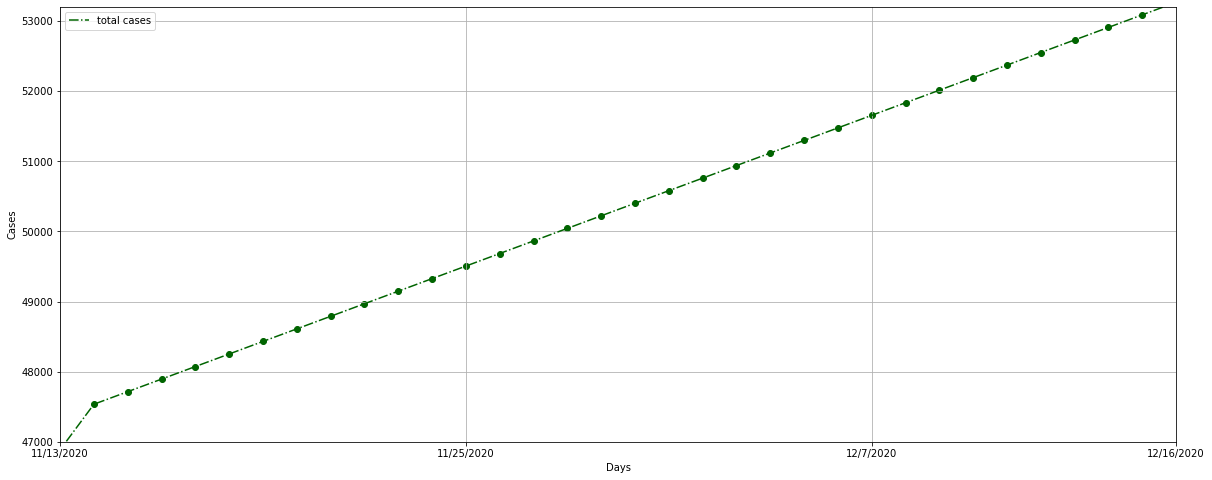

In [264]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(47000,53200)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

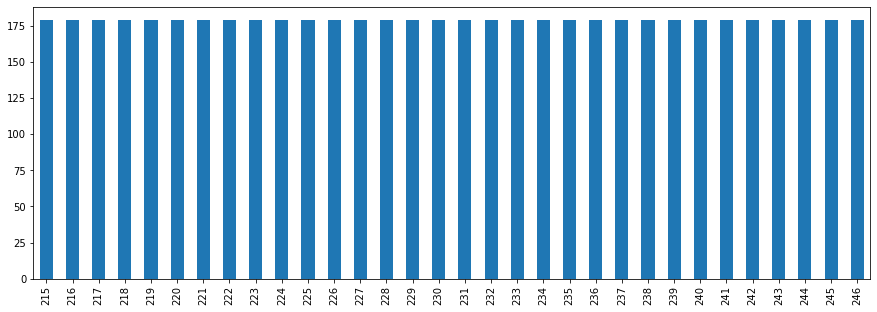

In [265]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [266]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(rr.predict([[i]])[0]+17992)
    list2.append((abs(data.at[i,'total_case']-list1[i-216])/data.at[i,'total_case'])*100) 

data['pred_total_case']=list1
data['error %']=list2
data[['Date','total_case','pred_total_case','error %']]

,Date,total_case,pred_total_case,error %
216,11/16/2020,48586,47893.714875,1.424865
217,11/17/2020,49067,48072.796571,2.026216
218,11/18/2020,49618,48251.878266,2.753279
219,11/19/2020,50252,48430.959961,3.623816
220,11/20/2020,50784,48610.041656,4.280794
221,11/21/2020,51398,48789.123351,5.075833
222,11/22/2020,51637,48968.205047,5.168377


In [267]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [269]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [270]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [271]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=rr.predict([[i]])+17992
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [272]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.000000
214,11/14/2020,47535.551485
215,11/15/2020,47714.633180
216,11/16/2020,47893.714875
217,11/17/2020,48072.796571
218,11/18/2020,48251.878266
219,11/19/2020,48430.959961
220,11/20/2020,48610.041656
221,11/21/2020,48789.123351
222,11/22/2020,48968.205047


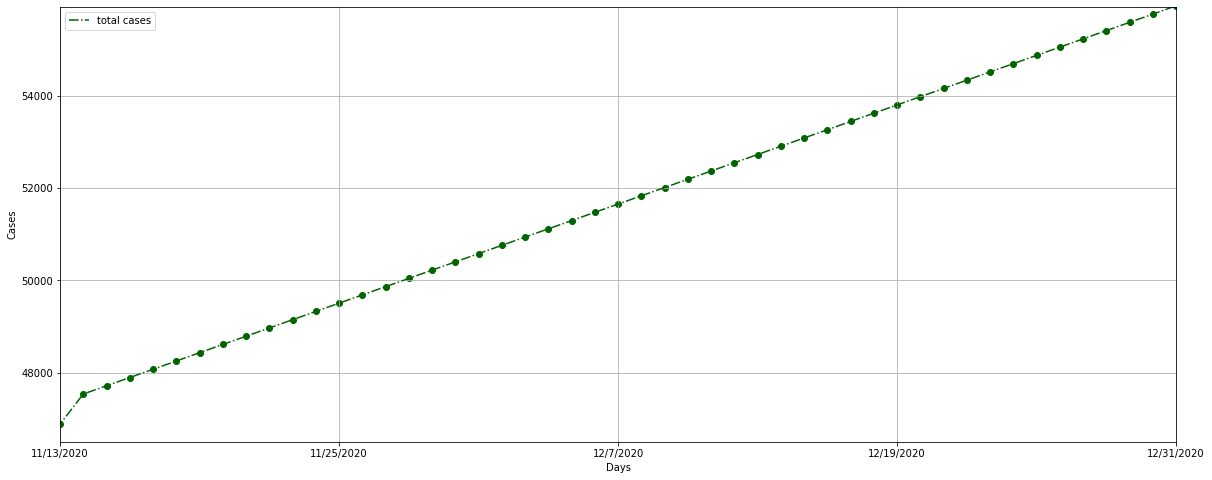

In [274]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,55929)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

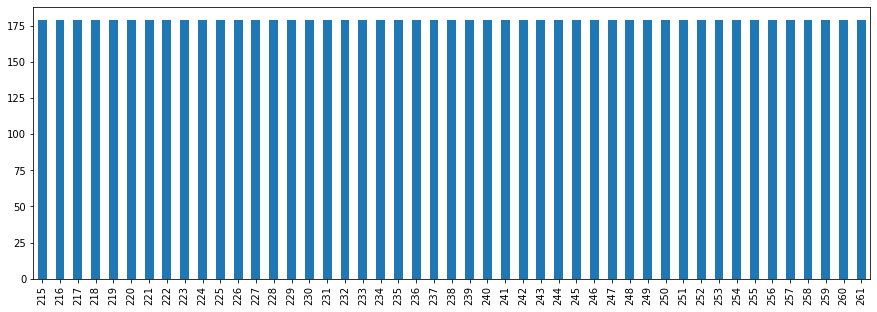

In [276]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [277]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

## Section 7

#### Kernel ridge regression using 'Day' as a feature and NEW CASES as a target

Kernel ridge regression (KRR) combines ridge regression (linear least squares with l2-norm regularization) with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space.

The form of the model learned by KRR is identical to support vector regression (SVR). However, different loss functions are used: KRR uses squared error loss while support vector regression uses epsilon-insensitive loss, both combined with l2 regularization. In contrast to SVR, fitting a KRR model can be done in closed-form and is typically faster for medium-sized datasets. On the other hand, the learned model is non-sparse and thus slower than SVR, which learns a sparse model for epsilon > 0, at prediction-time.
The solution can be written in closed form as:

$$α=(K+τI)^{−1} y$$
where K is the kernel matrix and α is the vector of weights in the space induced by the kernel. The learned function can then be evaluated as $$f(x)=\sum_{i=1}^n α_i k(x,xi)$$.

In [278]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

In [279]:
X = df[['Day']]
y = df['new_case']

In [280]:
from sklearn.kernel_ridge import KernelRidge

In [281]:
def MAE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = krr.predict(X)[i]
        s+= abs(df['new_case'][i] - y_hat)
    return s/len(df)

In [282]:
error=[]
for i in range(3,50):
    krr = KernelRidge(degree=i)
    krr.fit(X,y)
    error.append(MAE(df)/100)

x=min(error)
print("The Best degree of polynom is ",error.index(x)+3)

The Best degree of polynom is  3


In [283]:
krr = KernelRidge(degree=3)

In [284]:
krr.fit(X,y)

KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

In [285]:
X_seq = np.linspace(X.min(),X.max(),len(df)).reshape(-1,1)

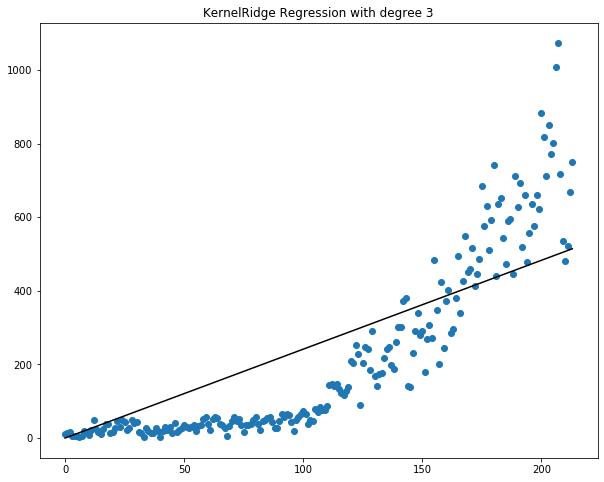

In [286]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X_seq,krr.predict(X_seq),color="black")
plt.title("KernelRidge Regression with degree "+str(3))
plt.show()

In [287]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = krr.predict(X)[i]
        s+= abs(df['new_case'][i] - y_hat)/df['new_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = krr.predict(X)[i]
        s+= ((df['new_case'][i] - y_hat)/df['new_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [288]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 2.1108057943635443 %
RMSE: 4.799704815787162 %


In [289]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [290]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [291]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=krr.predict([[i]])+215
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [292]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,731.613292,47617.613292
215,11/15/2020,734.027373,48351.640665
216,11/16/2020,736.441454,49088.082118
217,11/17/2020,738.855534,49826.937652
218,11/18/2020,741.269615,50568.207268
219,11/19/2020,743.683696,51311.890963
220,11/20/2020,746.097777,52057.988740
221,11/21/2020,748.511858,52806.500598
222,11/22/2020,750.925938,53557.426536


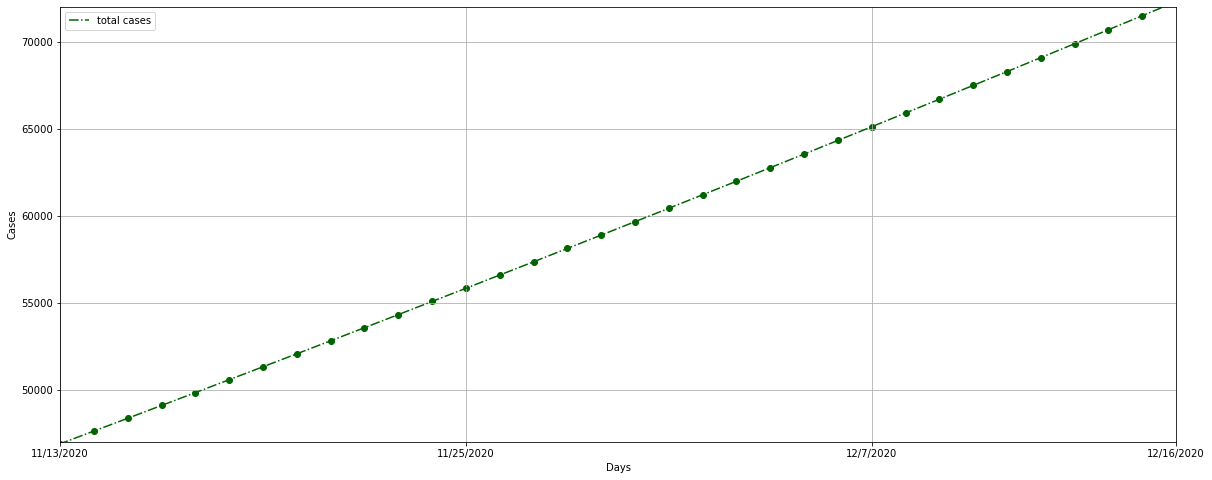

In [293]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(47000,72000)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

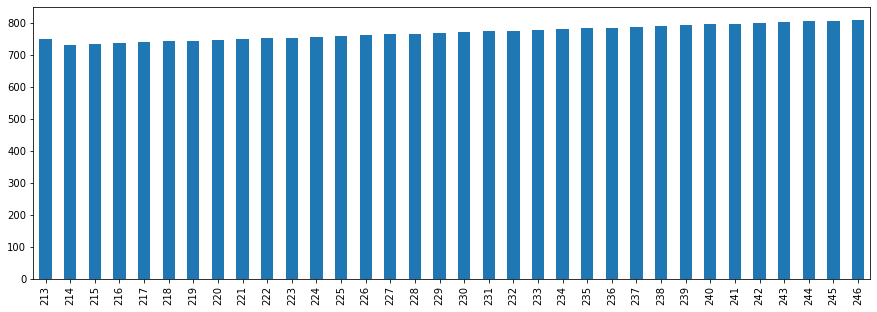

In [294]:
df['new_case'][213:].plot.bar(figsize=(15,5))

In [295]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(krr.predict([[i]])[0]+215)
    list2.append((abs(data.at[i,'new_case']-list1[i-216])/data.at[i,'new_case'])*100) 

data['pred_new_case']=list1
data['error %']=list2
data[['Date','new_case','pred_new_case','error %']]

,Date,new_case,pred_new_case,error %
216,11/16/2020,407,736.441454,80.943846
217,11/17/2020,481,738.855534,53.608219
218,11/18/2020,551,741.269615,34.531691
219,11/19/2020,634,743.683696,17.300267
220,11/20/2020,532,746.097777,40.243943
221,11/21/2020,614,748.511858,21.907469
222,11/22/2020,239,750.925938,214.194953


In [296]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [297]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [298]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [299]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=krr.predict([[i]])+215
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [300]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,731.613292,47617.613292
215,11/15/2020,734.027373,48351.640665
216,11/16/2020,736.441454,49088.082118
217,11/17/2020,738.855534,49826.937652
218,11/18/2020,741.269615,50568.207268
219,11/19/2020,743.683696,51311.890963
220,11/20/2020,746.097777,52057.988740
221,11/21/2020,748.511858,52806.500598
222,11/22/2020,750.925938,53557.426536


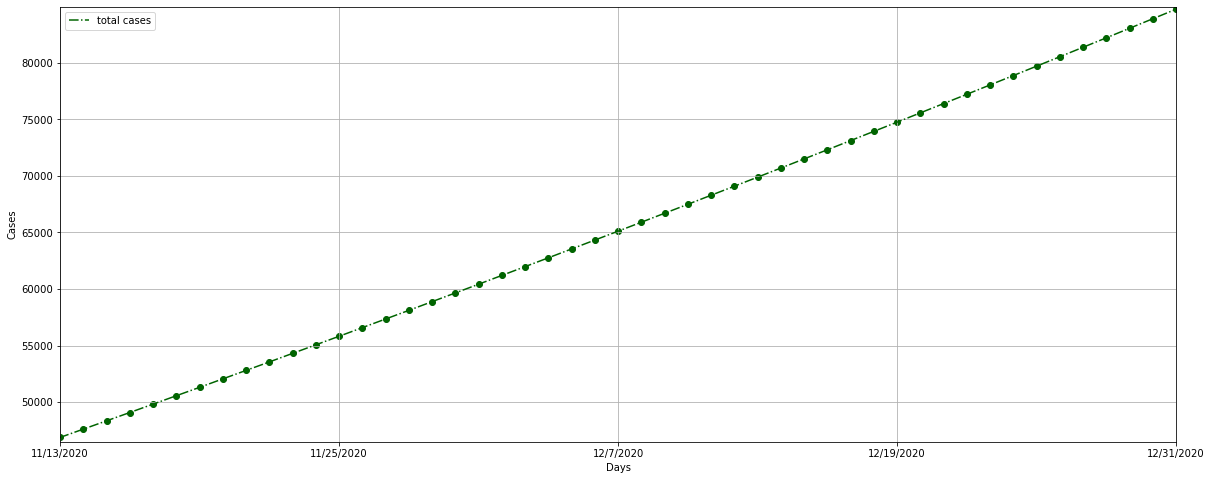

In [301]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,84929)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

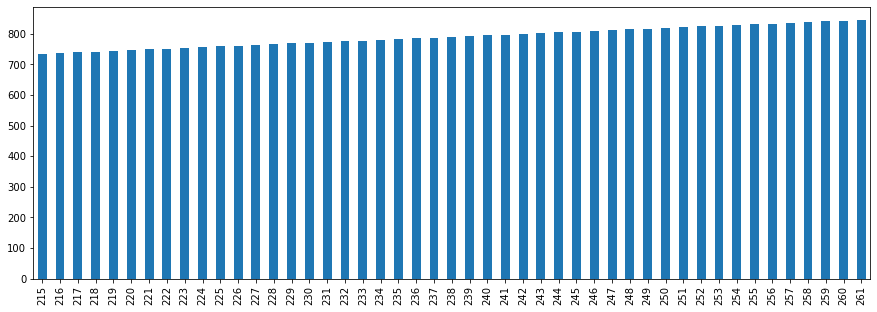

In [302]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [303]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Kernel ridge regression using 'Day' as a feature and TOTAL CASES as a target

In [304]:
X = df[['Day']]
y = df['total_case']

In [305]:
def MAE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = krr.predict(X)[i]
        s+= abs(df['total_case'][i] - y_hat)
    return s/len(df)

In [306]:
error=[]
for i in range(3,50):
    krr = KernelRidge(degree=i)
    krr.fit(X,y)
    error.append(MAE(df)/100)

x=min(error)
print("The Best degree of polynom is ",error.index(x)+3)

The Best degree of polynom is  3


In [307]:
krr = KernelRidge(degree=3)

In [308]:
krr.fit(X,y)

KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

In [309]:
X_seq = np.linspace(X.min(),X.max(),len(df)).reshape(-1,1)

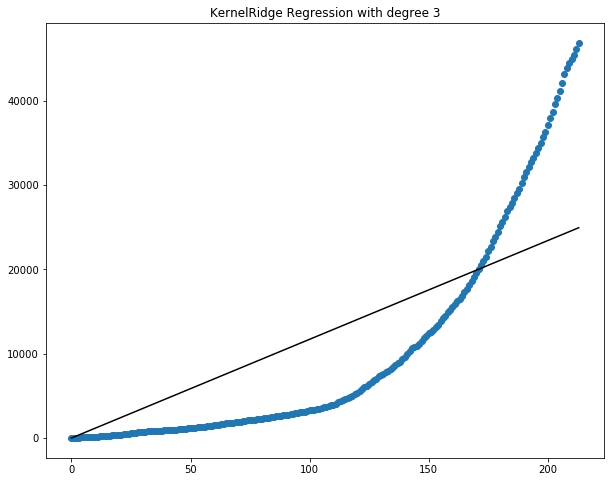

In [310]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X_seq,krr.predict(X_seq),color="black")
plt.title("KernelRidge Regression with degree "+str(3))
plt.show()

In [311]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = krr.predict(X)[i]
        s+= abs(df['total_case'][i] - y_hat)/df['total_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = krr.predict(X)[i]
        s+= ((df['total_case'][i] - y_hat)/df['total_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [312]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 2.304319949511161 %
RMSE: 3.036818558684911 %


In [313]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [314]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [315]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=krr.predict([[i]])+21930
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [316]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.000000
214,11/14/2020,46986.928648
215,11/15/2020,47104.017098
216,11/16/2020,47221.105551
217,11/17/2020,47338.194003
218,11/18/2020,47455.282454
219,11/19/2020,47572.370905
220,11/20/2020,47689.459357
221,11/21/2020,47806.547810
222,11/22/2020,47923.636261


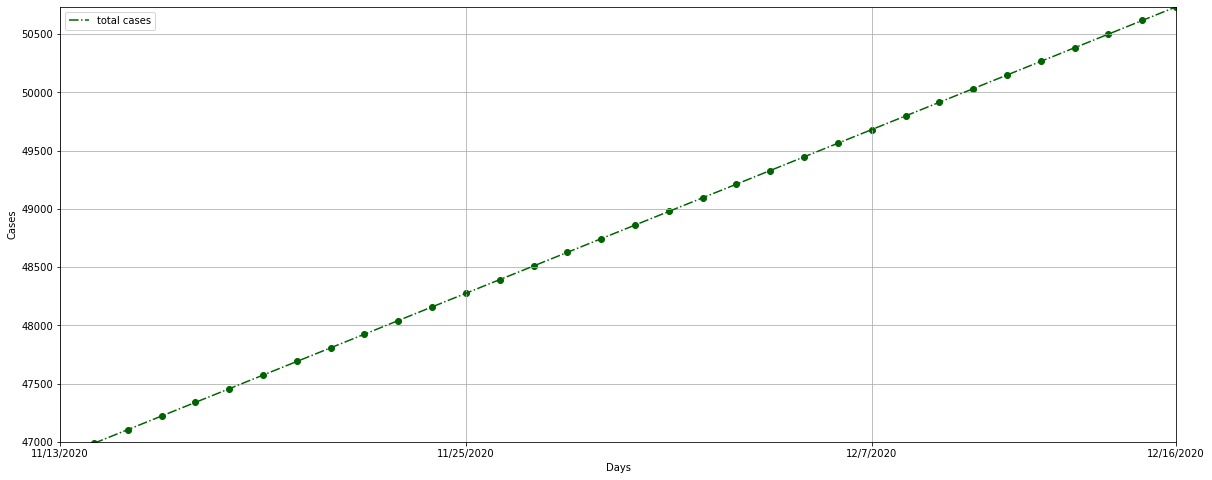

In [317]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(47000,50733)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

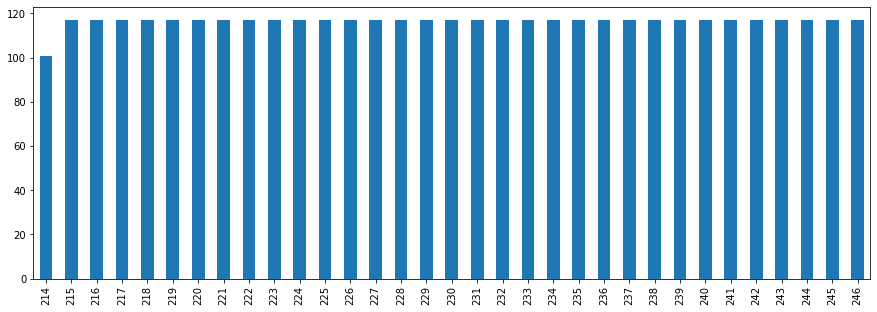

In [318]:
df['new_case'][214:].plot.bar(figsize=(15,5))

In [319]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(krr.predict([[i]])[0]+21930)
    list2.append((abs(data.at[i,'total_case']-list1[i-216])/data.at[i,'total_case'])*100) 

data['pred_total_case']=list1
data['error %']=list2
data[['Date','total_case','pred_total_case','error %']]

,Date,total_case,pred_total_case,error %
216,11/16/2020,48586,47221.105551,2.809234
217,11/17/2020,49067,47338.194003,3.523358
218,11/18/2020,49618,47455.282454,4.358736
219,11/19/2020,50252,47572.370905,5.332383
220,11/20/2020,50784,47689.459357,6.093535
221,11/21/2020,51398,47806.547810,6.987533
222,11/22/2020,51637,47923.636261,7.191285


In [320]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [321]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [322]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [323]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=krr.predict([[i]])+21930
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [324]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.000000
214,11/14/2020,46986.928648
215,11/15/2020,47104.017098
216,11/16/2020,47221.105551
217,11/17/2020,47338.194003
218,11/18/2020,47455.282454
219,11/19/2020,47572.370905
220,11/20/2020,47689.459357
221,11/21/2020,47806.547810
222,11/22/2020,47923.636261


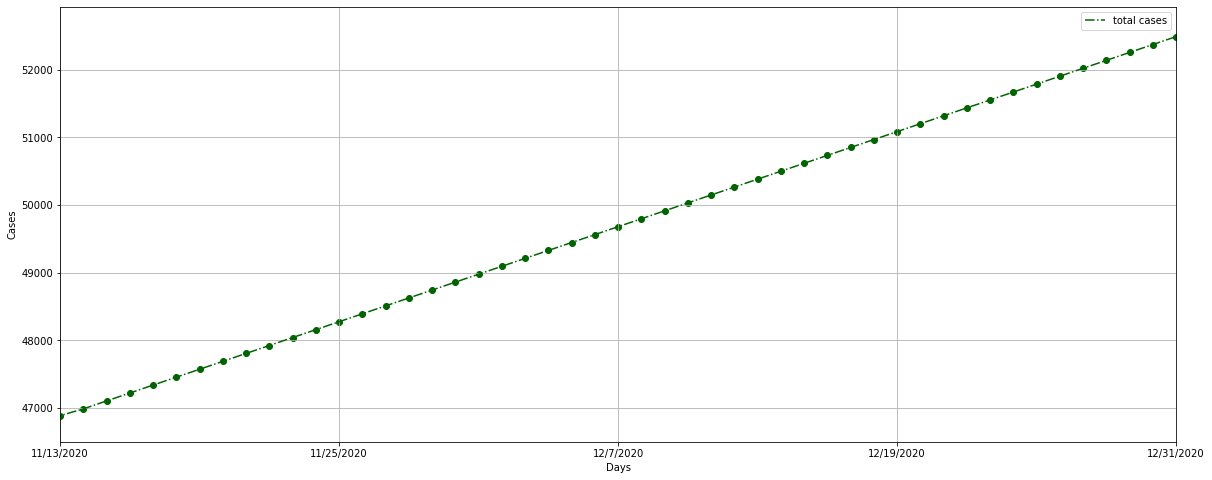

In [326]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,52929)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

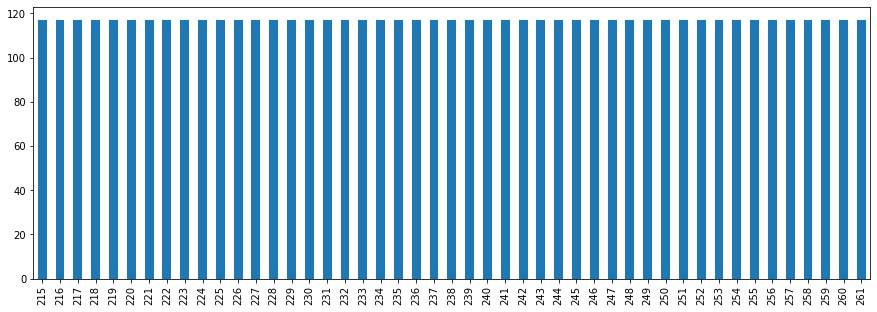

In [327]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [328]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

## Section 8

#### ElasticNet using 'Day' as a feature and NEW CASES as a target with alpha = 0.1

Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function:

$$1 / (2 * n_samples) * ||y - Xw||^2_2
+ alpha * l1_{ratio} * ||w||_1 
+ 0.5 * alpha * (1 - l1_{ratio}) * ||w||^2_2$$
If you are interested in controlling the L1 and L2 penalty separately, keep in mind that this is equivalent to:

$$a * L1 + b * L2$$
where:

$$alpha = a + b$$ and $$l1_{ratio} = a / (a + b)$$
The parameter l1_ratio corresponds to alpha in the glmnet R package while alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio = 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable, unless you supply your own sequence of alpha.

In [329]:
from sklearn.linear_model import ElasticNet

In [330]:
X = df[['Day']]
y = df['new_case']

In [331]:
en = ElasticNet(alpha=0.1)

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [333]:
en.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [334]:
predictions = en.predict(X_test)

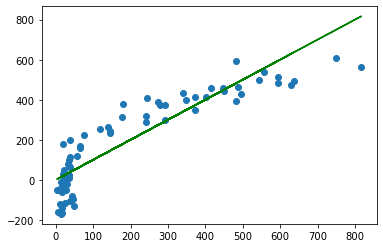

In [335]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [336]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= abs(df['new_case'][i] - y_hat)/df['new_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= ((df['new_case'][i] - y_hat)/df['new_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [337]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 2.6416029809052715 %
RMSE: 6.117750913588568 %


In [338]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [339]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [340]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=en.predict([[i]])
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [341]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,609.942497,47495.942497
215,11/15/2020,613.606457,48109.548954
216,11/16/2020,617.270417,48726.819371
217,11/17/2020,620.934376,49347.753748
218,11/18/2020,624.598336,49972.352084
219,11/19/2020,628.262296,50600.614380
220,11/20/2020,631.926256,51232.540635
221,11/21/2020,635.590215,51868.130850
222,11/22/2020,639.254175,52507.385025


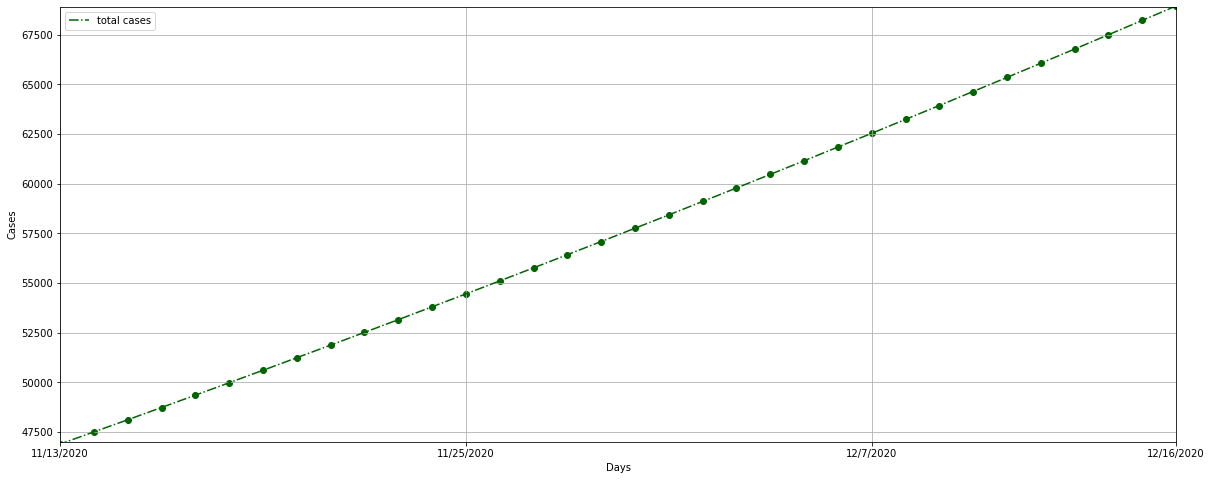

In [342]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(47000,68900)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

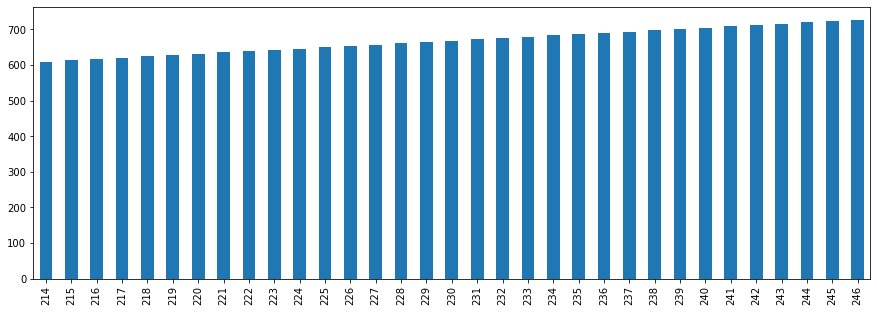

In [343]:
df['new_case'][214:].plot.bar(figsize=(15,5))

In [344]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(en.predict([[i]])[0])
    list2.append((abs(data.at[i,'new_case']-list1[i-216])/data.at[i,'new_case'])*100) 

data['pred_new_case']=list1
data['error %']=list2
data[['Date','new_case','pred_new_case','error %']]

,Date,new_case,pred_new_case,error %
216,11/16/2020,407,617.270417,51.663493
217,11/17/2020,481,620.934376,29.092386
218,11/18/2020,551,624.598336,13.357230
219,11/19/2020,634,628.262296,0.905001
220,11/20/2020,532,631.926256,18.783131
221,11/21/2020,614,635.590215,3.516322
222,11/22/2020,239,639.254175,167.470366


In [345]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [347]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [348]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [349]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=en.predict([[i]])
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [350]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,609.942497,47495.942497
215,11/15/2020,613.606457,48109.548954
216,11/16/2020,617.270417,48726.819371
217,11/17/2020,620.934376,49347.753748
218,11/18/2020,624.598336,49972.352084
219,11/19/2020,628.262296,50600.614380
220,11/20/2020,631.926256,51232.540635
221,11/21/2020,635.590215,51868.130850
222,11/22/2020,639.254175,52507.385025


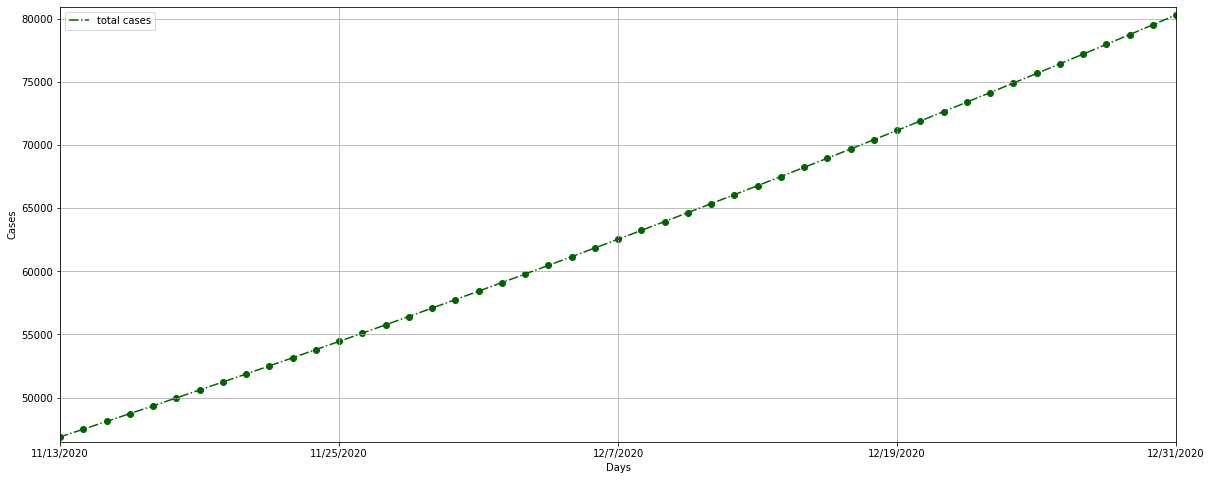

In [352]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,80929)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

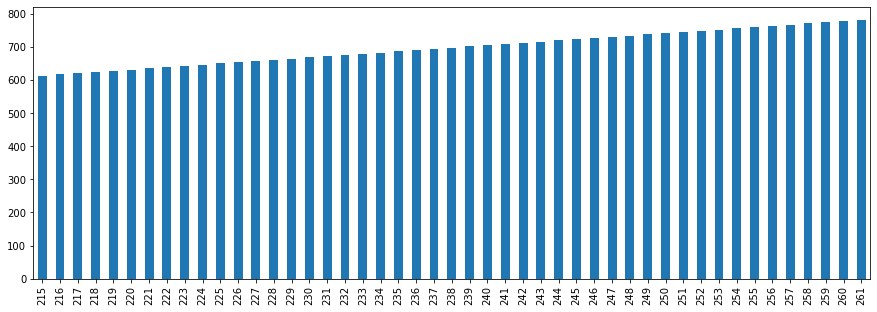

In [353]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [354]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### ElasticNet using 'Day' as a feature and NEW CASES as a target alpha = 1

In [355]:
en = ElasticNet(alpha=1)

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [357]:
en.fit(X_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [358]:
predictions = en.predict(X_test)

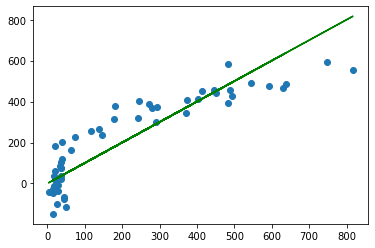

In [359]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [360]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= abs(df['new_case'][i] - y_hat)/df['new_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= ((df['new_case'][i] - y_hat)/df['new_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [361]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 2.4062839623508485 %
RMSE: 5.434034564694671 %


In [362]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [363]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [364]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=en.predict([[i]])+100
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [365]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,698.784504,47584.784504
215,11/15/2020,702.311491,48287.095995
216,11/16/2020,705.838479,48992.934474
217,11/17/2020,709.365466,49702.299940
218,11/18/2020,712.892453,50415.192393
219,11/19/2020,716.419440,51131.611833
220,11/20/2020,719.946428,51851.558261
221,11/21/2020,723.473415,52575.031675
222,11/22/2020,727.000402,53302.032078


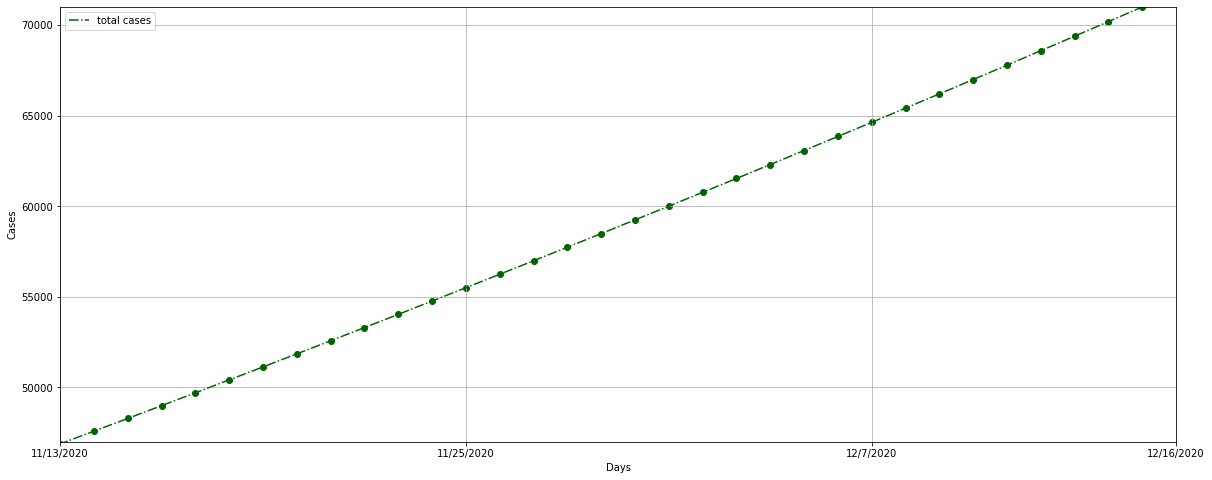

In [366]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(47000,71000)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

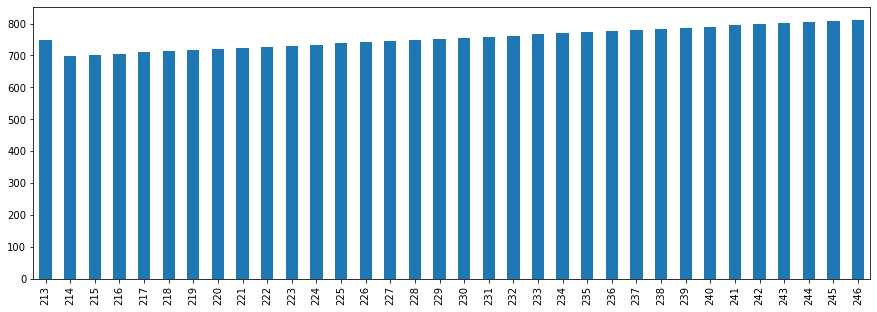

In [367]:
df['new_case'][213:].plot.bar(figsize=(15,5))

In [368]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(en.predict([[i]])[0]+100)
    list2.append((abs(data.at[i,'new_case']-list1[i-216])/data.at[i,'new_case'])*100) 

data['pred_new_case']=list1
data['error %']=list2
data[['Date','new_case','pred_new_case','error %']]

,Date,new_case,pred_new_case,error %
216,11/16/2020,407,705.838479,73.424688
217,11/17/2020,481,709.365466,47.477228
218,11/18/2020,551,712.892453,29.381570
219,11/19/2020,634,716.419440,12.999912
220,11/20/2020,532,719.946428,35.328276
221,11/21/2020,614,723.473415,17.829546
222,11/22/2020,239,727.000402,204.184269


In [369]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [370]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [371]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [372]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=en.predict([[i]])+100
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [373]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,698.784504,47584.784504
215,11/15/2020,702.311491,48287.095995
216,11/16/2020,705.838479,48992.934474
217,11/17/2020,709.365466,49702.299940
218,11/18/2020,712.892453,50415.192393
219,11/19/2020,716.419440,51131.611833
220,11/20/2020,719.946428,51851.558261
221,11/21/2020,723.473415,52575.031675
222,11/22/2020,727.000402,53302.032078


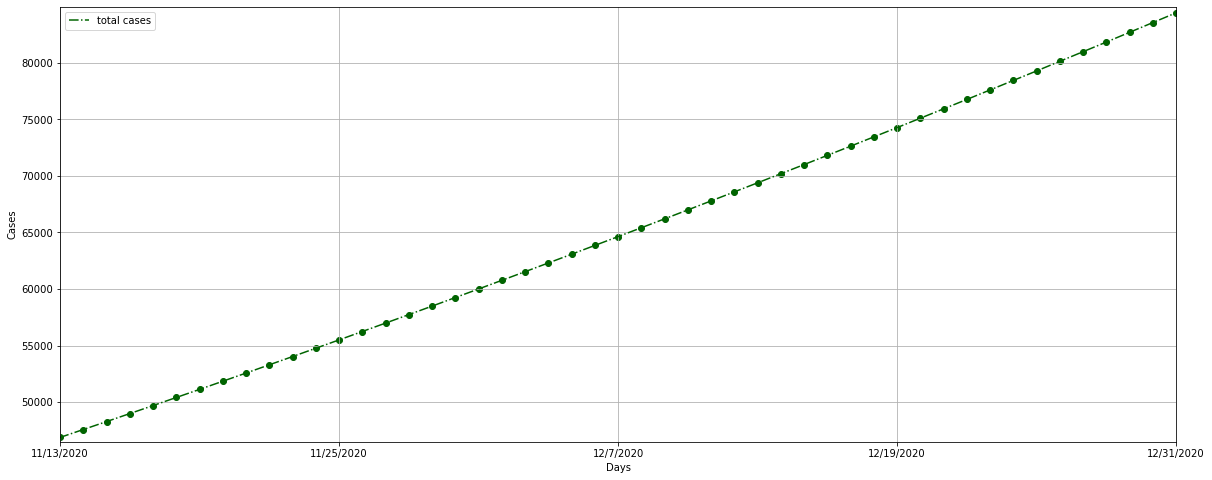

In [374]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,84929)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

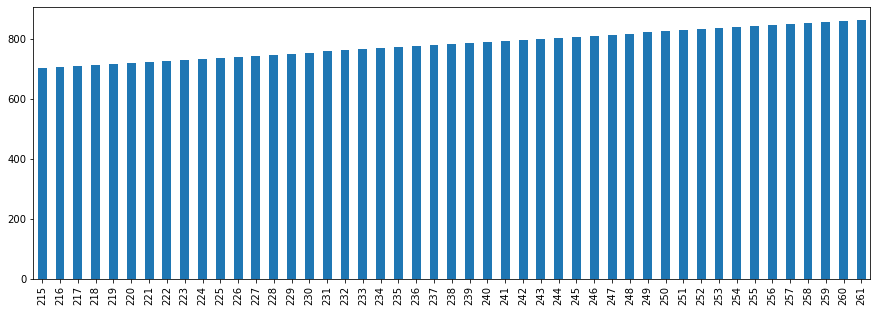

In [375]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [376]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### ElasticNet using 'Day' as a feature and TOTAL CASES as a target with alpha = 0.1

In [377]:
X = df[['Day']]
y = df['total_case']

In [378]:
en = ElasticNet(alpha=0.1)

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [380]:
en.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [381]:
predictions = en.predict(X_test)

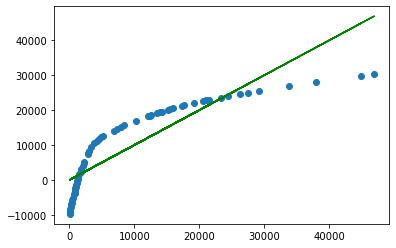

In [382]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [383]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= abs(df['total_case'][i] - y_hat)/df['total_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= ((df['total_case'][i] - y_hat)/df['total_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [384]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 10.57413302622502 %
RMSE: 40.85770136475096 %


In [385]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [386]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [387]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=en.predict([[i]])+16932
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [388]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.000000
214,11/14/2020,47485.088461
215,11/15/2020,47674.234477
216,11/16/2020,47863.380493
217,11/17/2020,48052.526509
218,11/18/2020,48241.672525
219,11/19/2020,48430.818541
220,11/20/2020,48619.964557
221,11/21/2020,48809.110572
222,11/22/2020,48998.256588


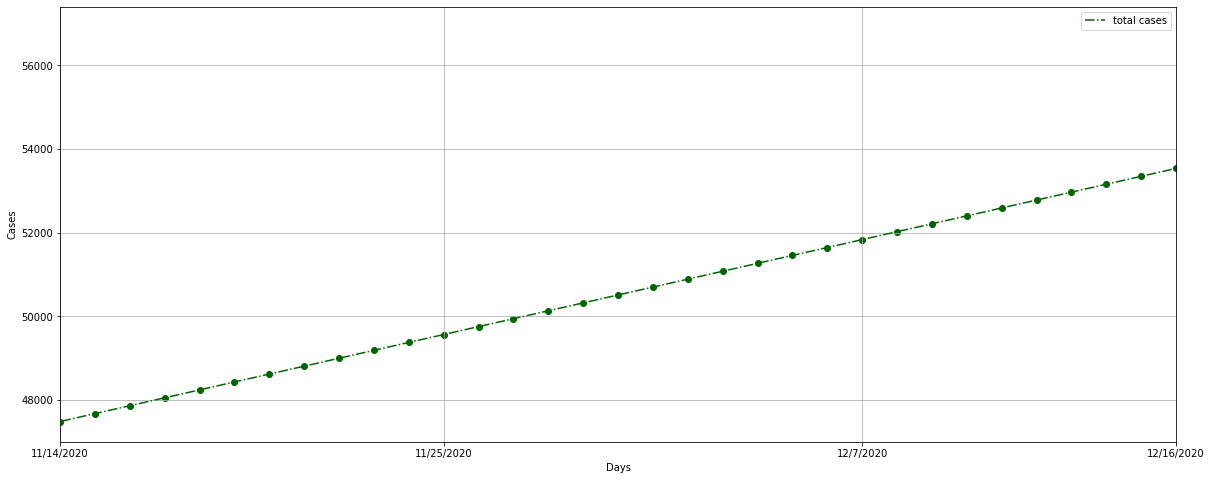

In [389]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/14/2020','12/16/2020')
ax.set_ylim(47000,57400)

ax.set_xticks(['11/14/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][214:],df['total_case'][214:],c='darkgreen')

ax.grid()

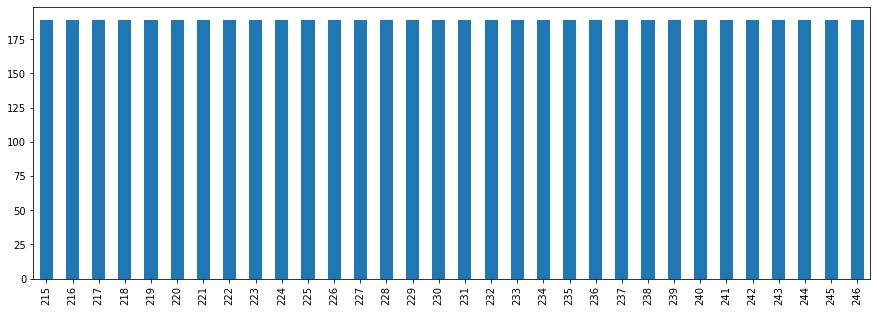

In [390]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [391]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

In [392]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(en.predict([[i]])[0])
    list2.append((abs(data.at[i,'total_case']-list1[i-216])/data.at[i,'total_case'])*100) 

data['pred_total_case']=list1
data['error %']=list2
data[['Date','total_case','pred_total_case','error %']]

,Date,total_case,pred_total_case,error %
216,11/16/2020,48586,30931.380493,36.336845
217,11/17/2020,49067,31120.526509,36.575445
218,11/18/2020,49618,31309.672525,36.898560
219,11/19/2020,50252,31498.818541,37.318279
220,11/20/2020,50784,31687.964557,37.602464
221,11/21/2020,51398,31877.110572,37.979862
222,11/22/2020,51637,32066.256588,37.900621


In [393]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [394]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [395]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [396]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=en.predict([[i]])+16932
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [397]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.000000
214,11/14/2020,47485.088461
215,11/15/2020,47674.234477
216,11/16/2020,47863.380493
217,11/17/2020,48052.526509
218,11/18/2020,48241.672525
219,11/19/2020,48430.818541
220,11/20/2020,48619.964557
221,11/21/2020,48809.110572
222,11/22/2020,48998.256588


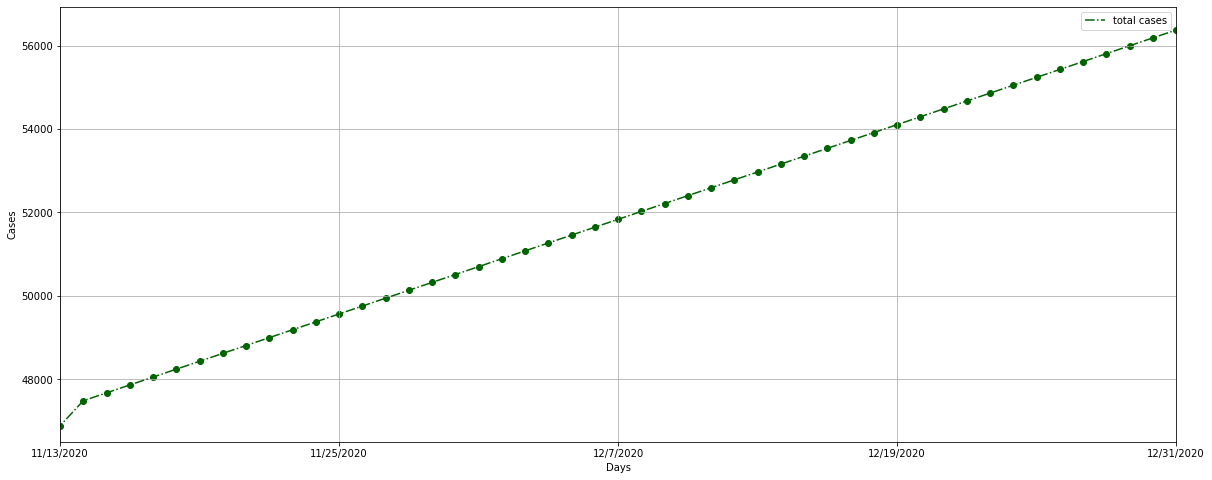

In [398]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,56929)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

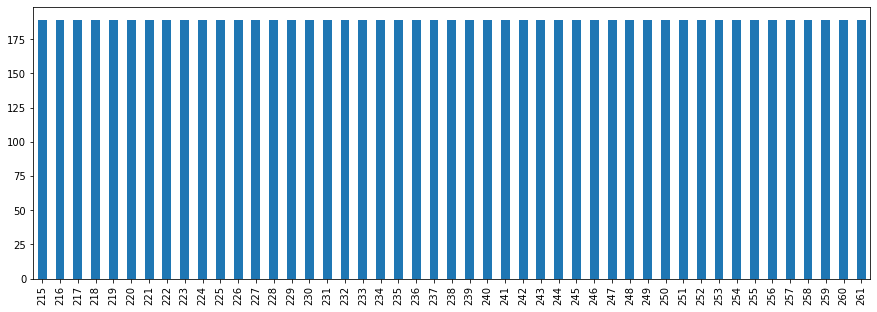

In [399]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [449]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### ElasticNet using 'Day' as a feature and TOTAL CASES as a target with alpha = 1

In [450]:
en = ElasticNet(alpha=1)

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=101)

In [452]:
en.fit(X_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [453]:
predictions = en.predict(X_test)

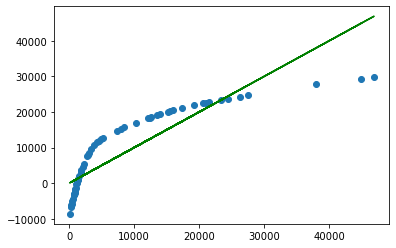

In [454]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [455]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= abs(df['total_case'][i] - y_hat)/df['total_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = en.predict(X)[i]
        s+= ((df['total_case'][i] - y_hat)/df['total_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [456]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 9.591287213706469 %
RMSE: 37.069227323036785 %


In [457]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [458]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [469]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=en.predict([[i]])+1279+15492+700
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [470]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.000000
214,11/14/2020,47586.777145
215,11/15/2020,47769.687999
216,11/16/2020,47952.598854
217,11/17/2020,48135.509708
218,11/18/2020,48318.420563
219,11/19/2020,48501.331417
220,11/20/2020,48684.242272
221,11/21/2020,48867.153126
222,11/22/2020,49050.063981


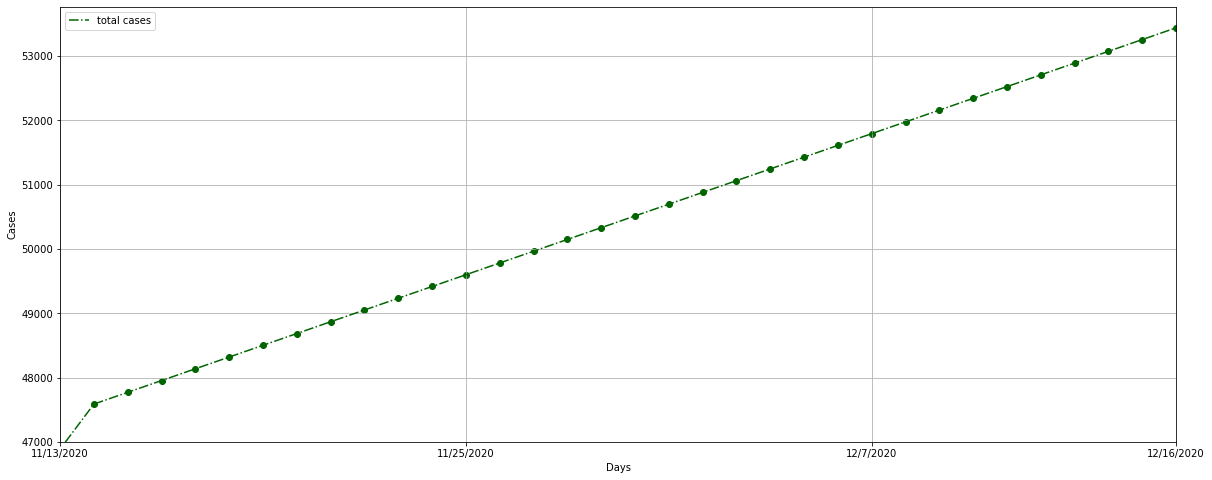

In [471]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(47000,53765)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

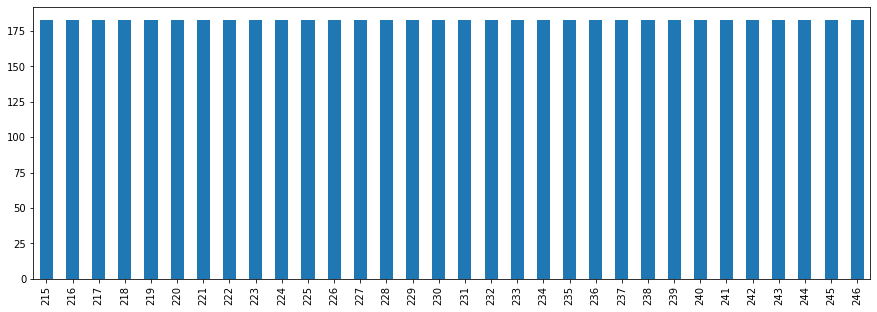

In [472]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [473]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

In [474]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(en.predict([[i]])[0])
    list2.append((abs(data.at[i,'total_case']-list1[i-216])/data.at[i,'total_case'])*100) 

data['pred_total_case']=list1
data['error %']=list2
data[['Date','total_case','pred_total_case','error %']]

,Date,total_case,pred_total_case,error %
216,11/16/2020,48586,30481.598854,37.262588
217,11/17/2020,49067,30664.509708,37.504821
218,11/18/2020,49618,30847.420563,37.830181
219,11/19/2020,50252,31030.331417,38.250554
220,11/20/2020,50784,31213.242272,38.537251
221,11/21/2020,51398,31396.153126,38.915613
222,11/22/2020,51637,31579.063981,38.844116


In [475]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [476]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [477]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [478]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=en.predict([[i]])+1279+15492+700
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [480]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.000000
214,11/14/2020,47586.777145
215,11/15/2020,47769.687999
216,11/16/2020,47952.598854
217,11/17/2020,48135.509708
218,11/18/2020,48318.420563
219,11/19/2020,48501.331417
220,11/20/2020,48684.242272
221,11/21/2020,48867.153126
222,11/22/2020,49050.063981


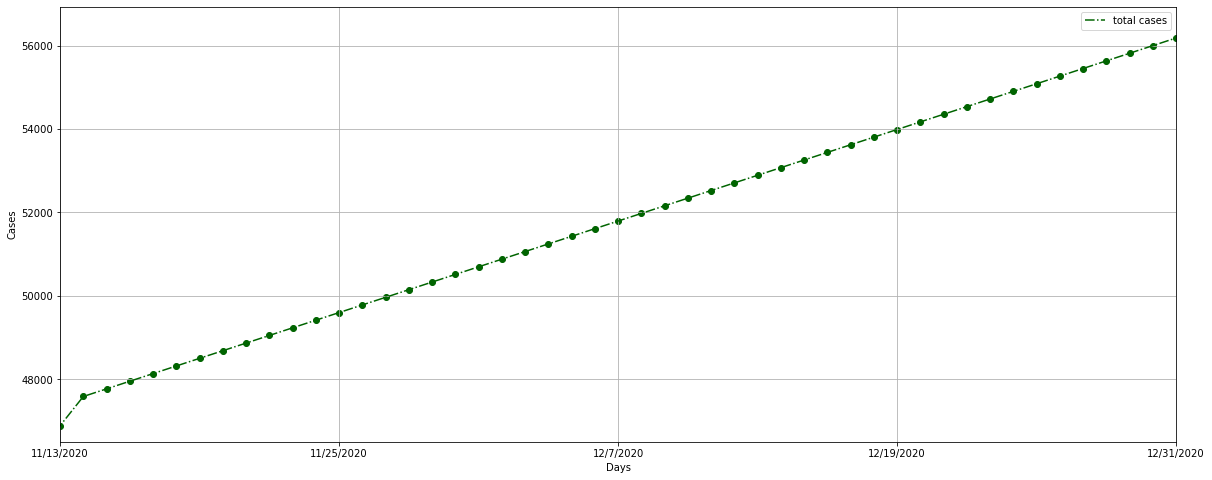

In [482]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,56929)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

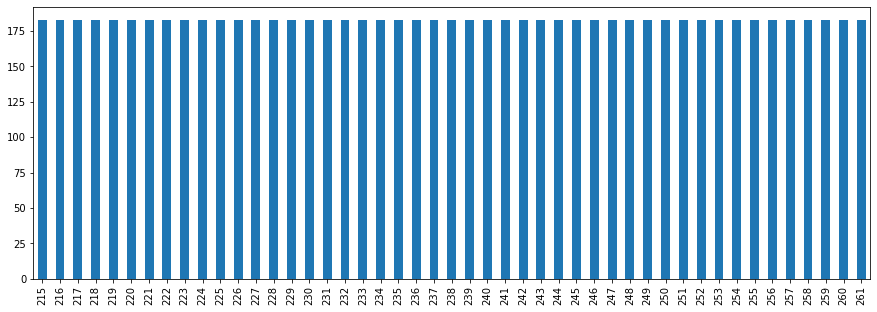

In [484]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [485]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

## Section 9

#### ElasticNetCV using 'Day' as a feature and NEW CASES as a target

Elastic Net model with iterative fitting along a regularization path.

See glossary entry for cross-validation estimator.

An estimator that has built-in cross-validation capabilities to automatically select the best hyper-parameters. Some example of cross-validation estimators are ElasticNetCV. Cross-validation estimators are named EstimatorCV and tend to be roughly equivalent to GridSearchCV(Estimator(), ...). The advantage of using a cross-validation estimator over the canonical Estimator class along with grid search is that they can take advantage of warm-starting by reusing precomputed results in the previous steps of the cross-validation process. This generally leads to speed improvements. An exception is the RidgeCV class, which can instead perform efficient Leave-One-Out CV.

In [486]:
from sklearn.linear_model import ElasticNetCV

In [487]:
X = df[['Day']]
y = df['new_case']

In [488]:
enCV = ElasticNetCV()

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [490]:
enCV.fit(X_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [491]:
predictions = enCV.predict(X_test)

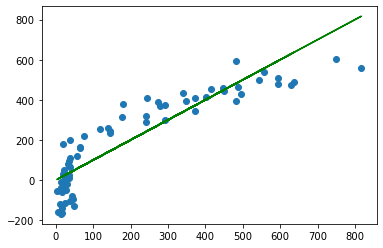

In [492]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [493]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = enCV.predict(X)[i]
        s+= abs(df['new_case'][i] - y_hat)/df['new_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = enCV.predict(X)[i]
        s+= ((df['new_case'][i] - y_hat)/df['new_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [494]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 2.6162608979872393 %
RMSE: 6.046423579713282 %


In [495]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [496]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [497]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=enCV.predict([[i]])
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [498]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,608.179790,47494.179790
215,11/15/2020,611.826786,48106.006577
216,11/16/2020,615.473782,48721.480359
217,11/17/2020,619.120778,49340.601136
218,11/18/2020,622.767774,49963.368910
219,11/19/2020,626.414769,50589.783679
220,11/20/2020,630.061765,51219.845444
221,11/21/2020,633.708761,51853.554205
222,11/22/2020,637.355757,52490.909962


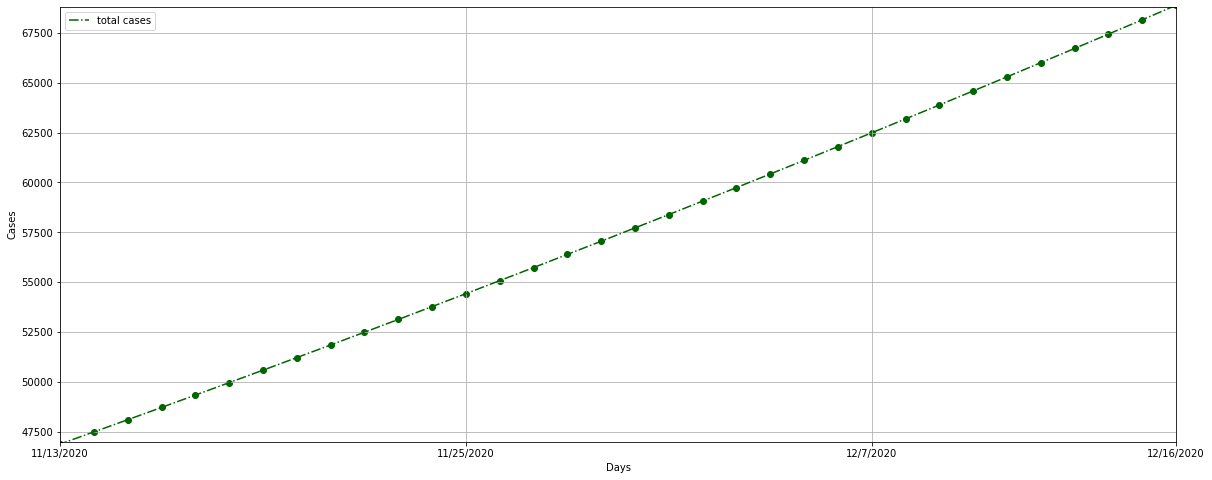

In [499]:
# plotting the total cases and total deaths between 01-10-2020 and 27-10-2020
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(47000,68800)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

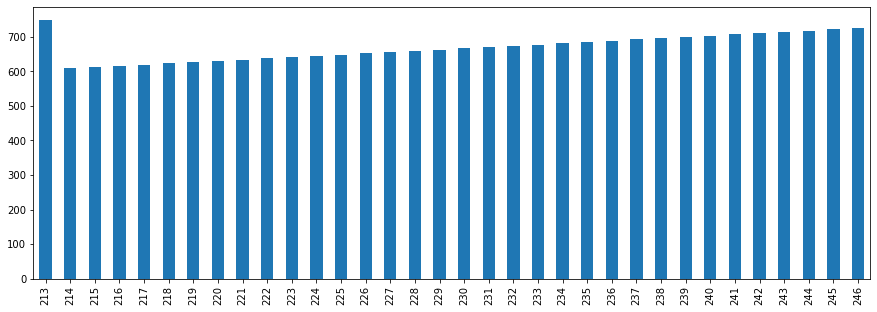

In [500]:
df['new_case'][213:].plot.bar(figsize=(15,5))

In [501]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

In [502]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(enCV.predict([[i]])[0])
    list2.append((abs(data.at[i,'new_case']-list1[i-216])/data.at[i,'new_case'])*100) 

data['pred_new_case']=list1
data['error %']=list2
data[['Date','new_case','pred_new_case','error %']]

,Date,new_case,pred_new_case,error %
216,11/16/2020,407,615.473782,51.222059
217,11/17/2020,481,619.120778,28.715338
218,11/18/2020,551,622.767774,13.025004
219,11/19/2020,634,626.414769,1.196409
220,11/20/2020,532,630.061765,18.432663
221,11/21/2020,614,633.708761,3.209896
222,11/22/2020,239,637.355757,166.676049


In [503]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [504]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [505]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [506]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=enCV.predict([[i]])
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [507]:
df[['Date','new_case','total_case']][213:]

,Date,new_case,total_case
213,11/13/2020,749.000000,46886.000000
214,11/14/2020,608.179790,47494.179790
215,11/15/2020,611.826786,48106.006577
216,11/16/2020,615.473782,48721.480359
217,11/17/2020,619.120778,49340.601136
218,11/18/2020,622.767774,49963.368910
219,11/19/2020,626.414769,50589.783679
220,11/20/2020,630.061765,51219.845444
221,11/21/2020,633.708761,51853.554205
222,11/22/2020,637.355757,52490.909962


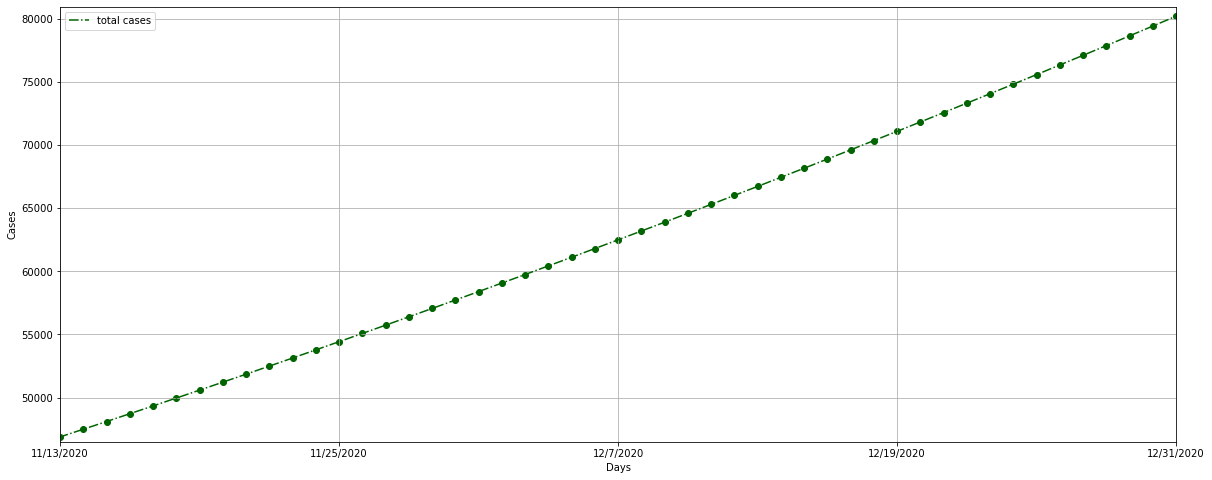

In [509]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,80929)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

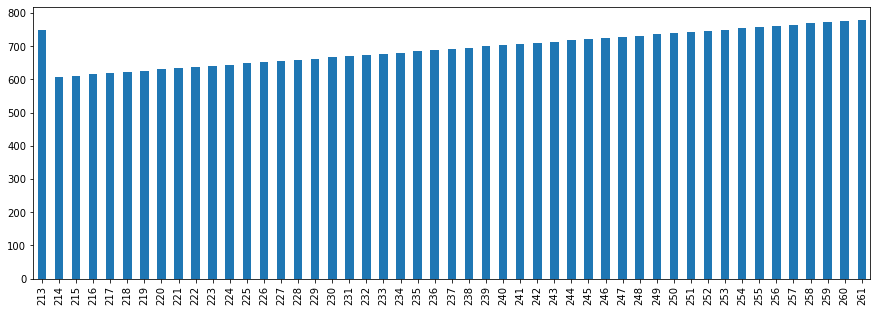

In [510]:
df['new_case'][213:].plot.bar(figsize=(15,5))

In [511]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### ElasticNetCV using 'Day' as a feature and TOTAL CASES as a target

In [512]:
X = df[['Day']]
y = df['total_case']

In [513]:
enCV = ElasticNetCV()

In [514]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [515]:
enCV.fit(X_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [516]:
predictions = enCV.predict(X_test)

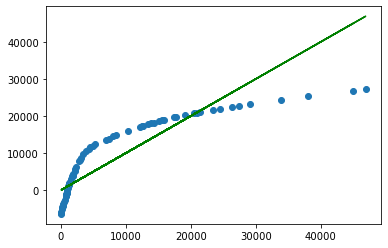

In [517]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [518]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = enCV.predict(X)[i]
        s+= abs(df['total_case'][i] - y_hat)/df['total_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = enCV.predict(X)[i]
        s+= ((df['total_case'][i] - y_hat)/df['total_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [519]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 6.9851616400430085 %
RMSE: 26.88038719448413 %


In [520]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [521]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [522]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=enCV.predict([[i]])+20000
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [523]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.000000
214,11/14/2020,47410.577296
215,11/15/2020,47569.480423
216,11/16/2020,47728.383549
217,11/17/2020,47887.286675
218,11/18/2020,48046.189801
219,11/19/2020,48205.092928
220,11/20/2020,48363.996054
221,11/21/2020,48522.899180
222,11/22/2020,48681.802307


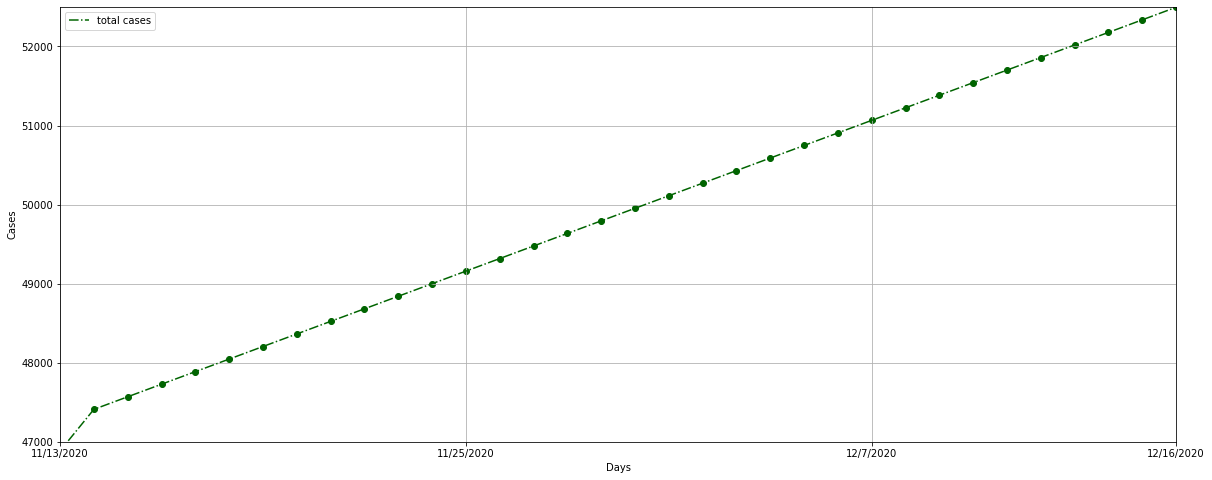

In [524]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(47000,52500)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

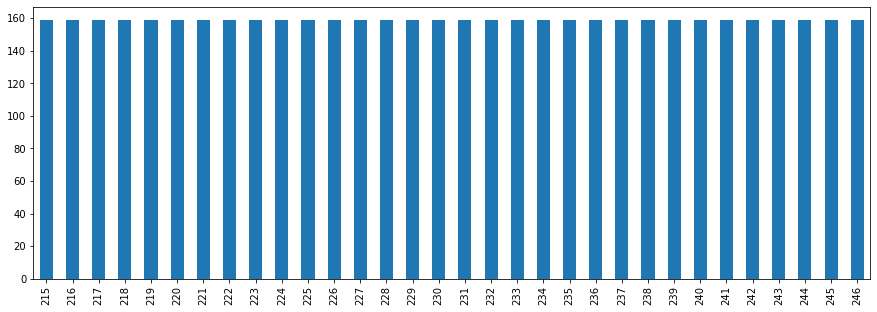

In [525]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [526]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

In [527]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(enCV.predict([[i]])[0]+20000)
    list2.append((abs(data.at[i,'total_case']-list1[i-216])/data.at[i,'total_case'])*100) 

data['pred_total_case']=list1
data['error %']=list2
data[['Date','total_case','pred_total_case','error %']]

,Date,total_case,pred_total_case,error %
216,11/16/2020,48586,47728.383549,1.765151
217,11/17/2020,49067,47887.286675,2.404291
218,11/18/2020,49618,48046.189801,3.167823
219,11/19/2020,50252,48205.092928,4.073285
220,11/20/2020,50784,48363.996054,4.765288
221,11/21/2020,51398,48522.899180,5.593799
222,11/22/2020,51637,48681.802307,5.723024


In [528]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [529]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [530]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [531]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'total_case']=enCV.predict([[i]])+20000
    df.at[i,'new_case']=df.at[i,'total_case']-df.at[i-1,'total_case']

In [533]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.000000
214,11/14/2020,47410.577296
215,11/15/2020,47569.480423
216,11/16/2020,47728.383549
217,11/17/2020,47887.286675
218,11/18/2020,48046.189801
219,11/19/2020,48205.092928
220,11/20/2020,48363.996054
221,11/21/2020,48522.899180
222,11/22/2020,48681.802307


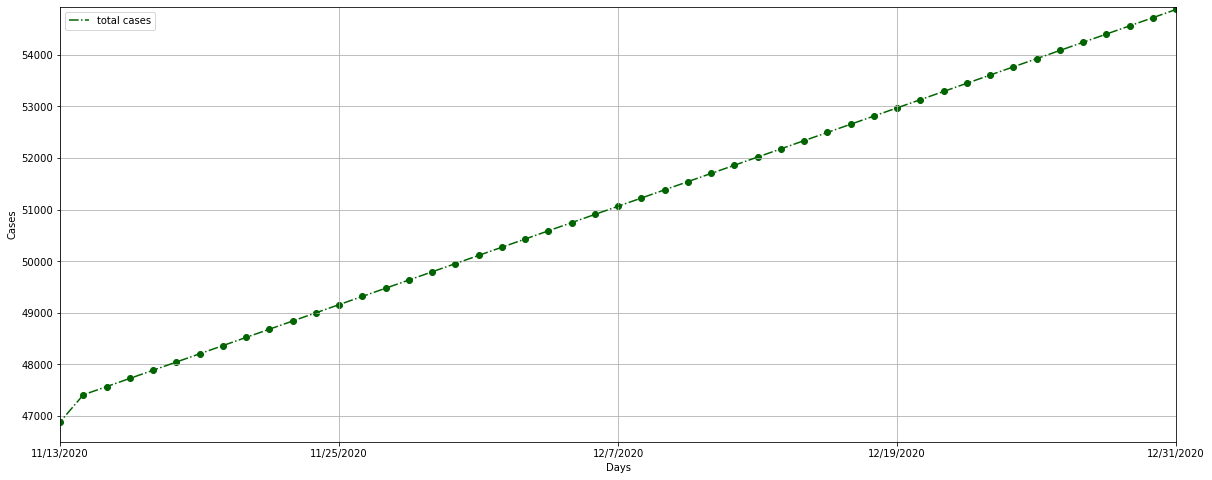

In [534]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,54929)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

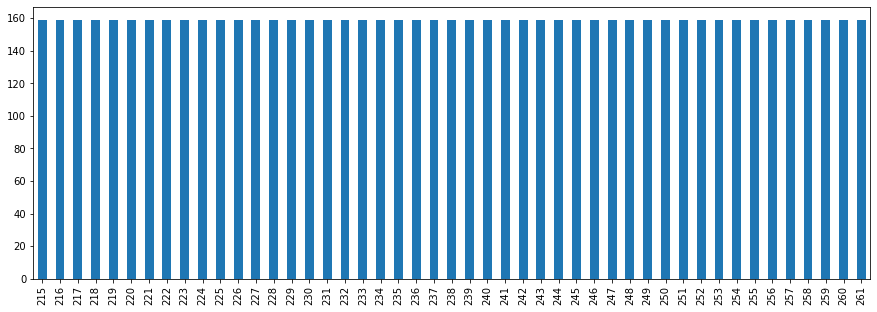

In [536]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [537]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

## Section 10

#### K-Nearest Regressor using 'Day' as a feature and NEW CASES as a target

Regression based on k-nearest neighbors.

The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [538]:
X = df[['Day']]
y = df['new_case']

In [539]:
from sklearn.neighbors import KNeighborsRegressor

In [540]:
def MAE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = knr.predict(X)[i]
        s+= abs(df['new_case'][i] - y_hat)
    return s/len(df)

In [541]:
error=[]
for i in range(3,50):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(X,y)
    error.append(MAE(df)/100)

x=min(error)
print("The Best degree of polynom is ",error.index(x)+3)

The Best degree of polynom is  3


In [542]:
knr = KNeighborsRegressor(n_neighbors=3)

In [543]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [544]:
knr.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [545]:
predictions = knr.predict(X_test)

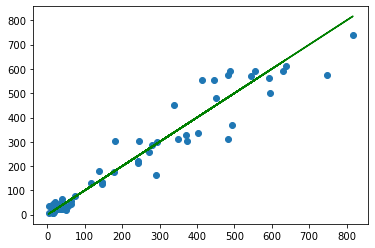

In [546]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [547]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = knr.predict(X)[i]
        s+= abs(df['new_case'][i] - y_hat)/df['new_case'][i]
    return s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = knr.predict(X)[i]
        s+= ((df['new_case'][i] - y_hat)/df['new_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return np.sqrt(MSPE(df))

In [548]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 0.3278493055323173 %
RMSE: 1.0322368311405217 %


In [549]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020',],columns=['Date'])

In [550]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [551]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=knr.predict([[i]])
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [552]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.0
214,11/14/2020,47461.0
215,11/15/2020,48036.0
216,11/16/2020,48611.0
217,11/17/2020,49186.0
218,11/18/2020,49761.0
219,11/19/2020,50336.0
220,11/20/2020,50911.0
221,11/21/2020,51486.0
222,11/22/2020,52061.0


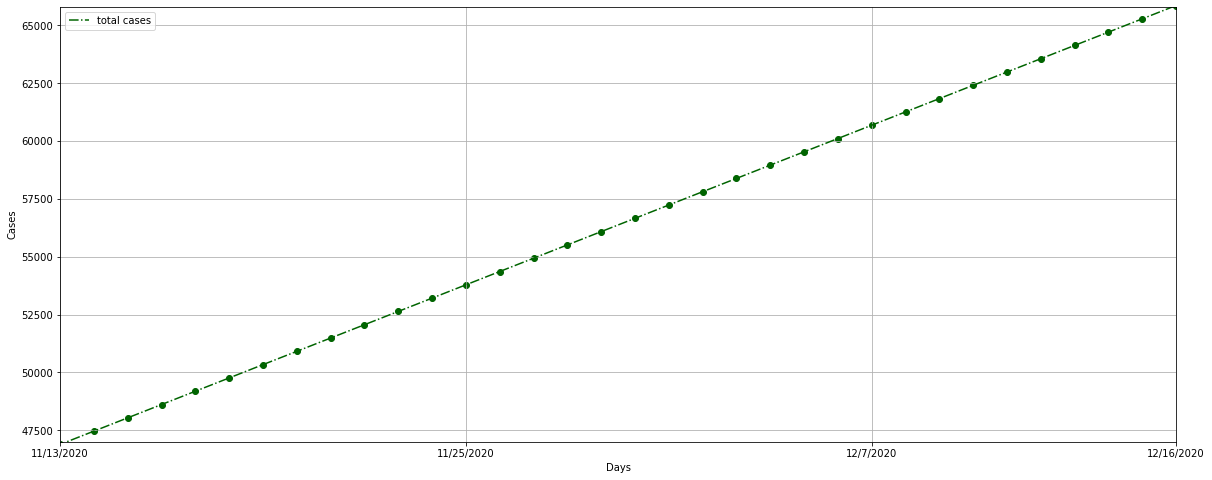

In [553]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/16/2020')
ax.set_ylim(47000,65800)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/16/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

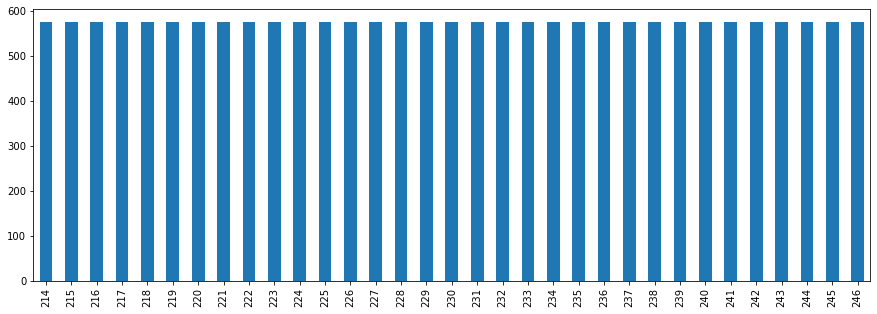

In [554]:
df['new_case'][214:].plot.bar(figsize=(15,5))

In [555]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

In [556]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(knr.predict([[i]])[0])
    list2.append((abs(data.at[i,'new_case']-list1[i-216])/data.at[i,'new_case'])*100) 

data['pred_new_case']=list1
data['error %']=list2
data[['Date','new_case','pred_new_case','error %']]

,Date,new_case,pred_new_case,error %
216,11/16/2020,407,575.0,41.277641
217,11/17/2020,481,575.0,19.542620
218,11/18/2020,551,575.0,4.355717
219,11/19/2020,634,575.0,9.305994
220,11/20/2020,532,575.0,8.082707
221,11/21/2020,614,575.0,6.351792
222,11/22/2020,239,575.0,140.585774


In [557]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### Prognosis from 13/11/2020 to 31/12/2020

In [558]:
df_temp = pd.DataFrame(['11/14/2020','11/15/2020','11/16/2020','11/17/2020','11/18/2020','11/19/2020','11/20/2020','11/21/2020',
                       '11/22/2020','11/23/2020','11/24/2020','11/25/2020','11/26/2020','11/27/2020','11/28/2020','11/29/2020',
                       '11/30/2020','12/1/2020','12/2/2020','12/3/2020','12/4/2020','12/5/2020','12/6/2020','12/7/2020',
                       '12/8/2020','12/9/2020','12/10/2020','12/11/2020','12/12/2020','12/13/2020','12/14/2020','12/15/2020',
                       '12/16/2020','12/17/2020','12/18/2020','12/19/2020','12/20/2020','12/21/2020','12/22/2020',
                       '12/23/2020','12/24/2020','12/25/2020','12/26/2020','12/27/2020','12/28/2020','12/29/2020',
                       '12/30/2020','12/31/2020',],columns=['Date'])

In [559]:
df = df.append(df_temp, ignore_index=True, sort=True)

In [560]:
for i in range(214,len(df)):
    df.at[i,'Day'] = i
    df.at[i,'new_case']=knr.predict([[i]])
    df.at[i,'total_case']=df.at[i-1,'total_case']+df.at[i,'new_case']

In [561]:
df[['Date','total_case']][213:]

,Date,total_case
213,11/13/2020,46886.0
214,11/14/2020,47461.0
215,11/15/2020,48036.0
216,11/16/2020,48611.0
217,11/17/2020,49186.0
218,11/18/2020,49761.0
219,11/19/2020,50336.0
220,11/20/2020,50911.0
221,11/21/2020,51486.0
222,11/22/2020,52061.0


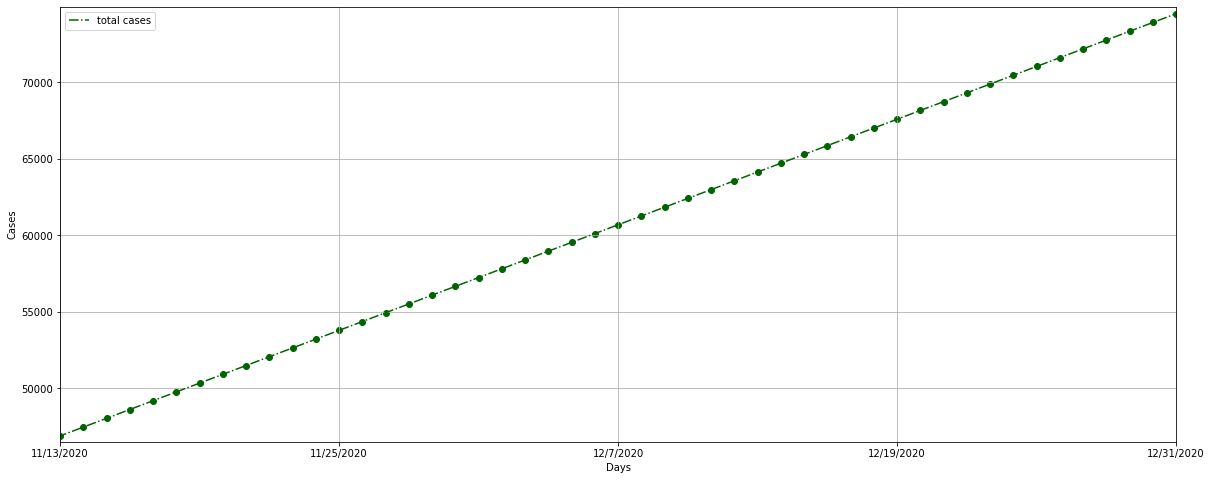

In [563]:
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot(df['Date'], df['total_case'],color='darkgreen',linestyle= '-.')

ax.set_ylabel("Cases")
ax.set_xlabel('Days')

ax.legend(['total cases'])

ax.set_xlim('11/13/2020','12/31/2020')
ax.set_ylim(46500,74929)

ax.set_xticks(['11/13/2020','11/25/2020','12/7/2020','12/19/2020','12/31/2020'])

ax.scatter(df['Date'][213:],df['total_case'][213:],c='darkgreen')

ax.grid()

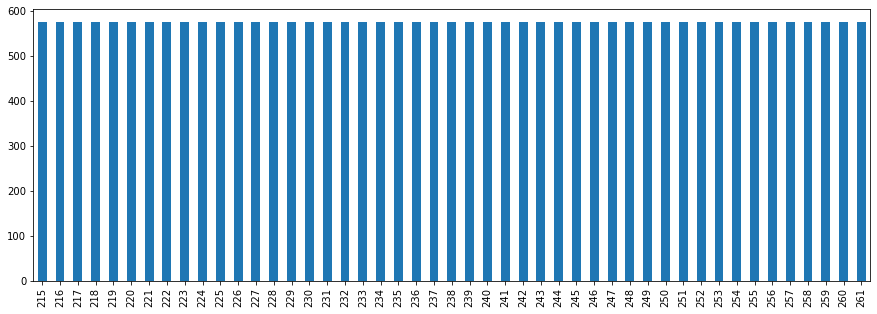

In [564]:
df['new_case'][215:].plot.bar(figsize=(15,5))

In [565]:
list=np.arange(214,len(df))
df.drop(list,axis=0,inplace=True)

#### K-Nearest Regressor using 'Day' as a feature and TOTAL CASES as a target

In [566]:
X = df[['Day']]
y = df['total_case']

In [567]:
def MAE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = knr.predict(X)[i]
        s+= abs(df['total_case'][i] - y_hat)
    return s/len(df)

In [568]:
error=[]
for i in range(3,50):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(X,y)
    error.append(MAE(df)/100)

x=min(error)
print("The Best degree of polynom is ",error.index(x)+3)

The Best degree of polynom is  3


In [569]:
knr = KNeighborsRegressor(n_neighbors=3)

In [570]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [571]:
knr.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [572]:
predictions = knr.predict(X_test)

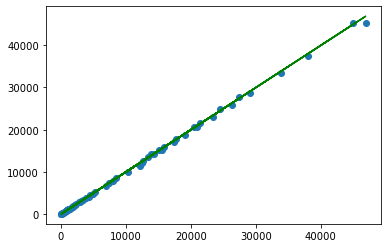

In [573]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,c='g')

In [574]:
def MAPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = knr.predict(X)[i]
        s+= abs(df['total_case'][i] - y_hat)/df['total_case'][i]
    return 10*s/len(df)

def MSPE(df):
    s=0
    for i in range(0,len(df)):
        y_hat = knr.predict(X)[i]
        s+= ((df['total_case'][i] - y_hat)/df['total_case'][i])**2
    return s/len(df)

def RMSPE(df):
    return 10*np.sqrt(MSPE(df))

In [575]:
print('MAE:', MAPE(df),'%')
print('RMSE:', RMSPE(df),'%')

MAE: 0.23872758306892758 %
RMSE: 0.8630353459061495 %


In [576]:
list1=[]
list2=[]
for i in range(216,223):
    list1.append(knr.predict([[i]])[0])
    list2.append((abs(data.at[i,'total_case']-list1[i-216])/data.at[i,'total_case'])*100) 

data['pred_total_case']=list1
data['error %']=list2
data[['Date','total_case','pred_total_case','error %']]

,Date,total_case,pred_total_case,error %
216,11/16/2020,48586,45357.333333,6.645261
217,11/17/2020,49067,45357.333333,7.560411
218,11/18/2020,49618,45357.333333,8.586938
219,11/19/2020,50252,45357.333333,9.740243
220,11/20/2020,50784,45357.333333,10.685780
221,11/21/2020,51398,45357.333333,11.752727
222,11/22/2020,51637,45357.333333,12.161176


## Section 11

In [577]:
res_1 = {'Linear': [2.41, 9.42], 'Non-Linear': [0.86, 0.04], 'Lasso': [2.64, 10.57], 'Ridge': [2.39, 9.32],
         'Kernel Ridge': [2.11, 2.3], 'ElasticNet 0.1': [2.64, 11.94], 'ElasticNet 1': [2.61, 6.98], 'ElasticNetCV': [6.04, 6.98],
         'KNR': [0.32, 0.23]}

In [578]:
res_2 = {'Linear': [5.43, 36.44], 'Non-Linear': [2.39, 0.07], 'Lasso': [6.11, 40.85], 'Ridge': [5.39, 36.04],
         'Kernel Ridge': [4.79, 3.03], 'ElasticNet 0.1': [6.11, 45.69], 'ElasticNet 1': [5.43, 36.05], 'ElasticNetCV': [6.04, 26.88],
         'KNR': [1.03, 0.86]}

In [579]:
df1 = pd.DataFrame(data=res_1)
df1.index = ['to predict new cases','to predict total cases']

#### Mean Absolute Error Table  ( Unit % )

In [580]:
df1

,Linear,Non-Linear,Lasso,Ridge,Kernel Ridge,ElasticNet 0.1,ElasticNet 1,ElasticNetCV,KNR
to predict new cases,2.41,0.86,2.64,2.39,2.11,2.64,2.61,6.04,0.32
to predict total cases,9.42,0.04,10.57,9.32,2.30,11.94,6.98,6.98,0.23


In [581]:
df2 = pd.DataFrame(data=res_2)
df2.index = ['to predict new cases','to predict total cases']

#### Root Mean Squared Error Table ( Unit % )

In [582]:
df2

,Linear,Non-Linear,Lasso,Ridge,Kernel Ridge,ElasticNet 0.1,ElasticNet 1,ElasticNetCV,KNR
to predict new cases,5.43,2.39,6.11,5.39,4.79,6.11,5.43,6.04,1.03
to predict total cases,36.44,0.07,40.85,36.04,3.03,45.69,36.05,26.88,0.86


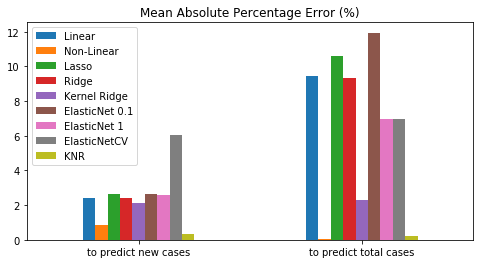

In [583]:
df1.plot.bar(rot=0,figsize=(8,4),title='Mean Absolute Percentage Error (%)')

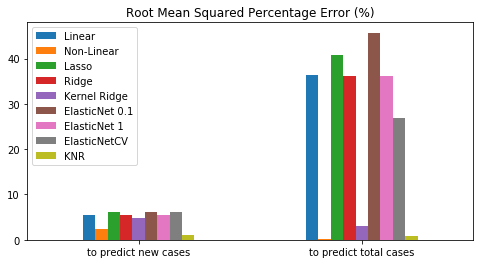

In [584]:
df2.plot.bar(rot=0,figsize=(8,4),title='Root Mean Squared Percentage Error (%)')

The End..